• **DOMAIN:** Semiconductor manufacturing process


• **CONTEXT:** A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring ofsignals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in aspecific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise.Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.


• **DATA DESCRIPTION:** signal-data.csv : (1567, 592)

The data consists of 1567 datapoints each with 591 features.The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.


• **PROJECT OBJECTIVE:** We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.


# 1. Import and understand the data.

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection  import StratifiedKFold
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB


### 1.A.  Import 'signal-data.csv' as DataFrame.

In [2]:
# Specify the file path.
file_path = 'signal-data.csv'

# Read the CSV file into a DataFrame and assign it to 'signal_df'.
signal_df = pd.read_csv(file_path)

In [3]:
# Display the first five rows of the DataFrame(signal_df). 
signal_df.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

In [4]:
# Display the last five rows of the DataFrame(signal_df). 
signal_df.tail()

Time        0        1          2          3       4  \
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5        6       7       8  ...       581     582     583     584  \
1562  100.0  82.2467  0.1248  1.3424  ...  203.1720  0.4988  0.0143  0.0039   
1563  100.0  98.4689  0.1205  1.4333  ...       NaN  0.4975  0.0131  0.0036   
1564  100.0  99.4122  0.1208     NaN  ...   43.5231  0.4987  0.0153  0.0041   
1565  100.0  98.7978  0.1213  1.4622  ...   93.4941  0.5004  0.0178  0.0038   
1566  100.0  85.1011  0.1235     NaN  ...  137.7844  0.4987  0.0181  0.0040   

         585     586     587     588       589  Pass/Fail  
1562  2.8669  0.0068  0.0138  0.0047  203.1720         -1  
1563  2.6238  0.0068  0.0138  0.0047  203.1720         -1  
1564  3.0590  0.0197  0.0086  0.0025   43.5231         -1  
1565  3.5662  0.0262  0.0245  0.0075   93.4941         -1  
1566  3.6275  0.0117  0.0162  0.0045  137.7844         -1  

[5 rows x 592 columns]

In [5]:
# Summary of Data(signal_df) Size and Dimensions.
print('The size of the data:', signal_df.size)
print('No of rows in the data:', signal_df.shape[0])
print('No of columns in the data:', signal_df.shape[1])

The size of the data: 927664
No of rows in the data: 1567
No of columns in the data: 592


In [6]:
# Checking the datatypes of all the columns. 
for column, dtype in zip(signal_df.columns, signal_df.dtypes.tolist()):
    print(f"Column '{column}': {dtype}")

Column 'Time': object
Column '0': float64
Column '1': float64
Column '2': float64
Column '3': float64
Column '4': float64
Column '5': float64
Column '6': float64
Column '7': float64
Column '8': float64
Column '9': float64
Column '10': float64
Column '11': float64
Column '12': float64
Column '13': float64
Column '14': float64
Column '15': float64
Column '16': float64
Column '17': float64
Column '18': float64
Column '19': float64
Column '20': float64
Column '21': float64
Column '22': float64
Column '23': float64
Column '24': float64
Column '25': float64
Column '26': float64
Column '27': float64
Column '28': float64
Column '29': float64
Column '30': float64
Column '31': float64
Column '32': float64
Column '33': float64
Column '34': float64
Column '35': float64
Column '36': float64
Column '37': float64
Column '38': float64
Column '39': float64
Column '40': float64
Column '41': float64
Column '42': float64
Column '43': float64
Column '44': float64
Column '45': float64
Column '46': float64
C

- 'Pass/Fail' column is currently of type int64, we will change it to a categorical data type.

In [7]:
# Changing 'Pass/Fail' column to a categorical data type.
signal_df['Pass/Fail'] = signal_df['Pass/Fail'].astype('category')

### 1.B. Print 5 point summary and share at least 2 observations.

In [8]:
summary= signal_df.describe().T

summary

count         mean         std        min          25%         50%  \
0    1561.0  3014.452896   73.621787  2743.2400  2966.260000  3011.49000   
1    1560.0  2495.850231   80.407705  2158.7500  2452.247500  2499.40500   
2    1553.0  2200.547318   29.513152  2060.6600  2181.044400  2201.06670   
3    1553.0  1396.376627  441.691640     0.0000  1081.875800  1285.21440   
4    1553.0     4.197013   56.355540     0.6815     1.017700     1.31680   
..      ...          ...         ...        ...          ...         ...   
585  1566.0     3.067826    3.578033     1.1975     2.306500     2.75765   
586  1566.0     0.021458    0.012358    -0.0169     0.013425     0.02050   
587  1566.0     0.016475    0.008808     0.0032     0.010600     0.01480   
588  1566.0     0.005283    0.002867     0.0010     0.003300     0.00460   
589  1566.0    99.670066   93.891919     0.0000    44.368600    71.90050   

             75%        max  
0    3056.650000  3356.3500  
1    2538.822500  2846.4400  
2    2218.055500  2315.2667  
3    1591.223500  3715.0417  
4       1.525700  1114.5366  
..           ...        ...  
585     3.295175    99.3032  
586     0.027600     0.1028  
587     0.020300     0.0799  
588     0.006400     0.0286  
589   114.749700   737.3048  

[590 rows x 8 columns]

The data appears to be divided into different categories, represented by the rows. Each row represents a different category or variable, and the columns represent various statistical measures.


- One interesting observation is that the "count" column is not consistent across all rows. The count varies for different variables, indicating that there may be missing data or variations in the number of observations for each variable.


- The "mean" column gives the average value for each variable. Looking at the "mean" values, we can see that they vary significantly across the different variables. For example, the mean values for the first three variables are relatively high, while the mean values for the last two variables are much smaller.


- The "std" (standard deviation) column represents the measure of dispersion or variability in the data. It shows how spread out the values are from the mean. From the standard deviation values, we can observe that the first three variables have relatively low standard deviations compared to the last two variables. This indicates that the values for the first three variables are more tightly clustered around the mean, while the values for the last two variables have a greater spread.


- The "min" and "max" columns represent the minimum and maximum values, respectively, for each variable. From these columns, we can see the range of values for each variable. It is interesting to note that the minimum and maximum values vary greatly across the different variables, indicating differences in the scale and magnitude of the data. For example, the minimum and maximum values for the last variable ("589") are 0 and 737.3048, respectively, while the minimum and maximum values for the fourth variable are 0 and 3715.0417, showing a wide range of values.


It seems that the dataset contains diverse signal data with varying characteristics, including differences in means, spread, and range. The presence of missing data or variations in the number of observations should be taken into account during any analysis or modeling efforts. Further exploration and analysis of the dataset would be required to gain deeper insights and draw meaningful conclusions about the underlying signals.

# 2. Data cleansing:

### 2.A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the  feature.

In [9]:
# Check which columns have null/missing values.
missing_values_count = signal_df.isnull().sum()
missing_values_count_with_names = missing_values_count.tolist()

column_names = signal_df.columns.tolist()

for column_name, missing_count in zip(column_names, missing_values_count_with_names):
    print(f"Column '{column_name}' has {missing_count} missing values.")

Column 'Time' has 0 missing values.
Column '0' has 6 missing values.
Column '1' has 7 missing values.
Column '2' has 14 missing values.
Column '3' has 14 missing values.
Column '4' has 14 missing values.
Column '5' has 14 missing values.
Column '6' has 14 missing values.
Column '7' has 9 missing values.
Column '8' has 2 missing values.
Column '9' has 2 missing values.
Column '10' has 2 missing values.
Column '11' has 2 missing values.
Column '12' has 2 missing values.
Column '13' has 3 missing values.
Column '14' has 3 missing values.
Column '15' has 3 missing values.
Column '16' has 3 missing values.
Column '17' has 3 missing values.
Column '18' has 3 missing values.
Column '19' has 10 missing values.
Column '20' has 0 missing values.
Column '21' has 2 missing values.
Column '22' has 2 missing values.
Column '23' has 2 missing values.
Column '24' has 2 missing values.
Column '25' has 2 missing values.
Column '26' has 2 missing values.
Column '27' has 2 missing values.
Column '28' has 

In [10]:
# Check which columns have null/missing values (in Percentage).
missing_values_count = signal_df.isnull().sum()
total_rows = signal_df.shape[0]

column_names = signal_df.columns.tolist()

for column_name, missing_count in zip(column_names, missing_values_count):
    percentage_missing = (missing_count / total_rows) * 100
    print(f"Column '{column_name}' has {missing_count} missing values, which is {percentage_missing:.2f}% of the total.")

Column 'Time' has 0 missing values, which is 0.00% of the total.
Column '0' has 6 missing values, which is 0.38% of the total.
Column '1' has 7 missing values, which is 0.45% of the total.
Column '2' has 14 missing values, which is 0.89% of the total.
Column '3' has 14 missing values, which is 0.89% of the total.
Column '4' has 14 missing values, which is 0.89% of the total.
Column '5' has 14 missing values, which is 0.89% of the total.
Column '6' has 14 missing values, which is 0.89% of the total.
Column '7' has 9 missing values, which is 0.57% of the total.
Column '8' has 2 missing values, which is 0.13% of the total.
Column '9' has 2 missing values, which is 0.13% of the total.
Column '10' has 2 missing values, which is 0.13% of the total.
Column '11' has 2 missing values, which is 0.13% of the total.
Column '12' has 2 missing values, which is 0.13% of the total.
Column '13' has 3 missing values, which is 0.19% of the total.
Column '14' has 3 missing values, which is 0.19% of the to

In [11]:
# Make a copy of the original DataFrame(signal_df).
signal_df_clean = signal_df.copy()

def remove_null_values(signal_df_clean):
    null_percentage = signal_df_clean.isnull().mean() * 100
    features_to_remove = []
    for feature, percentage in zip(signal_df_clean.columns, null_percentage):
        if percentage > 20:  # Use 20 instead of 0.20 to represent 20% as a whole number
            features_to_remove.append(feature)
    signal_df_clean.drop(features_to_remove, axis=1, inplace=True)
    signal_df_clean.fillna(signal_df_clean.mean(), inplace=True)
    return signal_df_clean

# Apply the function to remove features with 20%+ null values and impute the rest with the mean
signal_df_clean = remove_null_values(signal_df_clean)

# The cleaned DataFrame with no features having 20%+ null values and imputed rest with means
signal_df_clean

C:\Users\reshm\AppData\Local\Temp\ipykernel_16052\4205247297.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  signal_df_clean.fillna(signal_df_clean.mean(), inplace=True)


Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7         8  ...      577     582     583     584  \
0     100.0   97.6133  0.1242  1.500500  ...  14.9509  0.5005  0.0118  0.0035   
1     100.0  102.3433  0.1247  1.496600  ...  10.9003  0.5019  0.0223  0.0055   
2     100.0   95.4878  0.1241  1.443600  ...   9.2721  0.4958  0.0157  0.0039   
3     100.0  104.2367  0.1217  1.488200  ...   8.5831  0.4990  0.0103  0.0025   
4     100.0  100.3967  0.1235  1.503100  ...  10.9698  0.4800  0.4766  0.1045   
...     ...       ...     ...       ...  ...      ...     ...     ...     ...   
1562  100.0   82.2467  0.1248  1.342400  ...  11.7256  0.4988  0.0143  0.0039   
1563  100.0   98.4689  0.1205  1.433300  ...  17.8379  0.4975  0.0131  0.0036   
1564  100.0   99.4122  0.1208  1.462862  ...  17.7267  0.4987  0.0153  0.0041   
1565  100.0   98.7978  0.1213  1.462200  ...  19.2104  0.5004  0.0178  0.0038   
1566  100.0   85.1011  0.1235  1.462862  ...  22.9183  0.4987  0.0181  0.0040   

          585       586       587       588         589  Pass/Fail  
0      2.3630  0.021458  0.016475  0.005283   99.670066         -1  
1      4.4447  0.009600  0.020100  0.006000  208.204500         -1  
2      3.1745  0.058400  0.048400  0.014800   82.860200          1  
3      2.0544  0.020200  0.014900  0.004400   73.843200         -1  
4     99.3032  0.020200  0.014900  0.004400   73.843200         -1  
...       ...       ...       ...       ...         ...        ...  
1562   2.8669  0.006800  0.013800  0.004700  203.172000         -1  
1563   2.6238  0.006800  0.013800  0.004700  203.172000         -1  
1564   3.0590  0.019700  0.008600  0.002500   43.523100         -1  
1565   3.5662  0.026200  0.024500  0.007500   93.494100         -1  
1566   3.6275  0.011700  0.016200  0.004500  137.784400         -1  

[1567 rows x 560 columns]

In [12]:
# Check if any column has null/missing values remaining.
missing_values_count = signal_df_clean.isnull().sum()

for column_name, missing_count in missing_values_count.items():
    print(f"Column '{column_name}' has {missing_count} missing values.")

Column 'Time' has 0 missing values.
Column '0' has 0 missing values.
Column '1' has 0 missing values.
Column '2' has 0 missing values.
Column '3' has 0 missing values.
Column '4' has 0 missing values.
Column '5' has 0 missing values.
Column '6' has 0 missing values.
Column '7' has 0 missing values.
Column '8' has 0 missing values.
Column '9' has 0 missing values.
Column '10' has 0 missing values.
Column '11' has 0 missing values.
Column '12' has 0 missing values.
Column '13' has 0 missing values.
Column '14' has 0 missing values.
Column '15' has 0 missing values.
Column '16' has 0 missing values.
Column '17' has 0 missing values.
Column '18' has 0 missing values.
Column '19' has 0 missing values.
Column '20' has 0 missing values.
Column '21' has 0 missing values.
Column '22' has 0 missing values.
Column '23' has 0 missing values.
Column '24' has 0 missing values.
Column '25' has 0 missing values.
Column '26' has 0 missing values.
Column '27' has 0 missing values.
Column '28' has 0 miss

### 2.B. Identify and drop the features which are having the same value for all the rows.

In [13]:
# Initialize a list to store columns with the same values
columns_with_same_values = []

# Iterating over each column and dropping if all values are the same.
for column in signal_df_clean.columns:
    if signal_df_clean[column].nunique() == 1:
        columns_with_same_values.append(column)
        signal_df_clean.drop(column, axis=1, inplace=True)

# Printing the columns with the same values
print("Columns with the same values:")
print(columns_with_same_values)

Columns with the same values:
['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']


In [14]:
signal_df_clean

Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

             6       7         8         9  ...      577     582     583  \
0      97.6133  0.1242  1.500500  0.016200  ...  14.9509  0.5005  0.0118   
1     102.3433  0.1247  1.496600 -0.000500  ...  10.9003  0.5019  0.0223   
2      95.4878  0.1241  1.443600  0.004100  ...   9.2721  0.4958  0.0157   
3     104.2367  0.1217  1.488200 -0.012400  ...   8.5831  0.4990  0.0103   
4     100.3967  0.1235  1.503100 -0.003100  ...  10.9698  0.4800  0.4766   
...        ...     ...       ...       ...  ...      ...     ...     ...   
1562   82.2467  0.1248  1.342400 -0.004500  ...  11.7256  0.4988  0.0143   
1563   98.4689  0.1205  1.433300 -0.006100  ...  17.8379  0.4975  0.0131   
1564   99.4122  0.1208  1.462862 -0.000841  ...  17.7267  0.4987  0.0153   
1565   98.7978  0.1213  1.462200 -0.007200  ...  19.2104  0.5004  0.0178   
1566   85.1011  0.1235  1.462862 -0.000841  ...  22.9183  0.4987  0.0181   

         584      585       586       587       588         589  Pass/Fail  
0     0.0035   2.3630  0.021458  0.016475  0.005283   99.670066         -1  
1     0.0055   4.4447  0.009600  0.020100  0.006000  208.204500         -1  
2     0.0039   3.1745  0.058400  0.048400  0.014800   82.860200          1  
3     0.0025   2.0544  0.020200  0.014900  0.004400   73.843200         -1  
4     0.1045  99.3032  0.020200  0.014900  0.004400   73.843200         -1  
...      ...      ...       ...       ...       ...         ...        ...  
1562  0.0039   2.8669  0.006800  0.013800  0.004700  203.172000         -1  
1563  0.0036   2.6238  0.006800  0.013800  0.004700  203.172000         -1  
1564  0.0041   3.0590  0.019700  0.008600  0.002500   43.523100         -1  
1565  0.0038   3.5662  0.026200  0.024500  0.007500   93.494100         -1  
1566  0.0040   3.6275  0.011700  0.016200  0.004500  137.784400         -1  

[1567 rows x 444 columns]

- We have successfully droped the features which are having the same value for all the rows.

### 2.C. Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [15]:
# Drop 'Time' column.
signal_df_clean1 = signal_df_clean.drop('Time',axis=1)

signal_df_clean1

0        1          2          3       4         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235   
...       ...      ...        ...        ...     ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  0.1235   

             8         9        10  ...      577     582     583     584  \
0     1.500500  0.016200 -0.003400  ...  14.9509  0.5005  0.0118  0.0035   
1     1.496600 -0.000500 -0.014800  ...  10.9003  0.5019  0.0223  0.0055   
2     1.443600  0.004100  0.001300  ...   9.2721  0.4958  0.0157  0.0039   
3     1.488200 -0.012400 -0.003300  ...   8.5831  0.4990  0.0103  0.0025   
4     1.503100 -0.003100 -0.007200  ...  10.9698  0.4800  0.4766  0.1045   
...        ...       ...       ...  ...      ...     ...     ...     ...   
1562  1.342400 -0.004500 -0.005700  ...  11.7256  0.4988  0.0143  0.0039   
1563  1.433300 -0.006100 -0.009300  ...  17.8379  0.4975  0.0131  0.0036   
1564  1.462862 -0.000841  0.000146  ...  17.7267  0.4987  0.0153  0.0041   
1565  1.462200 -0.007200  0.003200  ...  19.2104  0.5004  0.0178  0.0038   
1566  1.462862 -0.000841  0.000146  ...  22.9183  0.4987  0.0181  0.0040   

          585       586       587       588         589  Pass/Fail  
0      2.3630  0.021458  0.016475  0.005283   99.670066         -1  
1      4.4447  0.009600  0.020100  0.006000  208.204500         -1  
2      3.1745  0.058400  0.048400  0.014800   82.860200          1  
3      2.0544  0.020200  0.014900  0.004400   73.843200         -1  
4     99.3032  0.020200  0.014900  0.004400   73.843200         -1  
...       ...       ...       ...       ...         ...        ...  
1562   2.8669  0.006800  0.013800  0.004700  203.172000         -1  
1563   2.6238  0.006800  0.013800  0.004700  203.172000         -1  
1564   3.0590  0.019700  0.008600  0.002500   43.523100         -1  
1565   3.5662  0.026200  0.024500  0.007500   93.494100         -1  
1566   3.6275  0.011700  0.016200  0.004500  137.784400         -1  

[1567 rows x 443 columns]

- We dropped the 'Time' column as it will not contribute towards model building.
- Time column only acts as an indicator - when were the signals from different sensors recorded.

In [16]:
# Let's check for highly correlated variables.
cor= signal_df_clean1.corr()

cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()

# Extract those features that have very high correlation - +/- 0.9.
highly_correlated_features = cor[(cor > 0.90) | (cor< -0.90)].to_dict()
highly_correlated_features


{('27', '25'): 0.9803753833240896,
 ('36', '34'): -0.9999999997052148,
 ('50', '46'): 0.904481825916677,
 ('54', '53'): 0.9352211984898346,
 ('70', '66'): 0.9044609903388541,
 ('96', '94'): -0.9570098301742919,
 ('101', '98'): 0.9067879315108982,
 ('104', '99'): -0.989545429124828,
 ('105', '92'): -0.9888957525678773,
 ('106', '93'): -0.9912928531099834,
 ('123', '121'): 0.9422826497625356,
 ('127', '122'): 0.962085701180184,
 ('140', '4'): 0.9999751247610734,
 ('148', '16'): 0.9702941014493074,
 ('152', '16'): 0.9775661160561907,
 ('152', '148'): 0.9910694582650631,
 ('154', '148'): 0.9396050560127639,
 ('164', '163'): 0.9248163707333443,
 ('165', '164'): 0.963662602553624,
 ('174', '172'): 0.9999998114016202,
 ('199', '196'): 0.9419809272931773,
 ('204', '67'): 0.9022307064188828,
 ('206', '74'): 0.9999999999999991,
 ('207', '196'): 0.9167918615124555,
 ('209', '74'): 1.0000000000000002,
 ('209', '206'): 0.9999999999999992,
 ('249', '114'): 0.9770501850466099,
 ('252', '117'): 0.9861

- In the above dictionary, we have two keys which are the two features/columns.
- One value which is the correlation between the two features/columns.
- We need to extract the features from the keys. 

In [17]:
# Empty Lists to store keys from dictionary
feature1 = []
feature2 = []

# Find feature names from keys in the dictionary and store in respective lists
for k1, k2 in highly_correlated_features.keys():
    feature1.append(k1)
    feature2.append(k2)

# Print names of Features
print('Feature1:\n', feature1)
print('')
print('Feature2:\n', feature2)

Feature1:
 ['27', '36', '50', '54', '70', '96', '101', '104', '105', '106', '123', '127', '140', '148', '152', '152', '154', '164', '165', '174', '199', '204', '206', '207', '209', '209', '249', '252', '270', '271', '272', '273', '274', '275', '275', '277', '278', '279', '280', '281', '282', '283', '283', '283', '283', '285', '286', '287', '287', '287', '287', '288', '289', '289', '289', '290', '291', '294', '295', '296', '297', '298', '298', '298', '299', '299', '299', '299', '300', '300', '300', '300', '300', '301', '302', '303', '304', '305', '306', '307', '307', '308', '309', '309', '309', '310', '311', '312', '317', '318', '319', '320', '321', '323', '324', '331', '332', '332', '332', '332', '333', '333', '334', '335', '335', '335', '336', '336', '336', '336', '336', '337', '338', '339', '339', '340', '340', '341', '341', '342', '342', '342', '343', '343', '343', '343', '343', '344', '347', '347', '347', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', 

- We can drop one of the feature list as the other list has features that are highly correlated with the first list.
- Hence we drop Feature1 list from the dataframe.

In [18]:
signal_df_clean2 = signal_df_clean1.drop(feature1, axis = 1)
signal_df_clean2

0        1          2          3       4         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235   
...       ...      ...        ...        ...     ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  0.1235   

             8         9        10  ...       570     571    572     573  \
0     1.500500  0.016200 -0.003400  ...  533.8500  2.1113   8.95  0.3157   
1     1.496600 -0.000500 -0.014800  ...  535.0164  2.4335   5.92  0.2653   
2     1.443600  0.004100  0.001300  ...  535.0245  2.0293  11.21  0.1882   
3     1.488200 -0.012400 -0.003300  ...  530.5682  2.0253   9.33  0.1738   
4     1.503100 -0.003100 -0.007200  ...  532.0155  2.0275   8.83  0.2224   
...        ...       ...       ...  ...       ...     ...    ...     ...   
1562  1.342400 -0.004500 -0.005700  ...  536.3418  2.0153   7.98  0.2363   
1563  1.433300 -0.006100 -0.009300  ...  537.9264  2.1814   5.48  0.3891   
1564  1.462862 -0.000841  0.000146  ...  530.3709  2.3435   6.49  0.4154   
1565  1.462200 -0.007200  0.003200  ...  534.3936  1.9098   9.13  0.3669   
1566  1.462862 -0.000841  0.000146  ...  528.7918  2.0831   6.81  0.4774   

         582     583       586       587         589  Pass/Fail  
0     0.5005  0.0118  0.021458  0.016475   99.670066         -1  
1     0.5019  0.0223  0.009600  0.020100  208.204500         -1  
2     0.4958  0.0157  0.058400  0.048400   82.860200          1  
3     0.4990  0.0103  0.020200  0.014900   73.843200         -1  
4     0.4800  0.4766  0.020200  0.014900   73.843200         -1  
...      ...     ...       ...       ...         ...        ...  
1562  0.4988  0.0143  0.006800  0.013800  203.172000         -1  
1563  0.4975  0.0131  0.006800  0.013800  203.172000         -1  
1564  0.4987  0.0153  0.019700  0.008600   43.523100         -1  
1565  0.5004  0.0178  0.026200  0.024500   93.494100         -1  
1566  0.4987  0.0181  0.011700  0.016200  137.784400         -1  

[1567 rows x 248 columns]

Handling high correlation between features in feature engineering is important to:

- Reduce redundancy and remove redundant information from the dataset.
- Improve model performance by mitigating multicollinearity issues.
- Enhance interpretability and ensure validity of model assumptions by promoting independence between features.

In [19]:
print('The size of the data:', signal_df_clean2.size)
print('No of rows in the data:', signal_df_clean2.shape[0])
print('No of columns in the data:', signal_df_clean2.shape[1])

The size of the data: 388616
No of rows in the data: 1567
No of columns in the data: 248


### 2.D. Check for multi-collinearity in the data and take necessary action.

- Multicollinearity occurs when two or more independent variables are highly correlated with one another.
- VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
- VIF score of an independent variable represents how well the variable is explained by other independent variables.
- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others


In [20]:
# Function for calculating VIF values for each column
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Shape of the dataframe on which multicollinearity treatment is to be done
print(signal_df_clean2.shape)

(1567, 248)


In [21]:
# Define Function to remove multi-collinearity
def remove_multicollinearity(df,vif_thresh=10):
    # Drop the target column Pass/Fail to avoid VIF calculation
    vif_data = df.iloc[:,:-1]
    # Calculate VIF for independent variables of dataframe
    vif_table = calc_vif(vif_data)
    # Find Maximum VIF value from the above table
    max_vif = vif_table[vif_table.VIF == vif_table.VIF.max()].iloc[0,1]
    # Find feature/column with maximum VIF value
    max_vif_feature = vif_table[vif_table.VIF == vif_table.VIF.max()].iloc[0,0]
    # Print Maximum VIF Value and Feature/Column
    print('Initial Max VIF',max_vif)
    print(' ')
    print('Initial Max VIF Feature to be dropped',max_vif_feature)
    # Dropping variables should be an iterative process starting with the variable having the largest VIF value 
    # because its trend is highly captured by other variables. 
    # Loop until maximum VIF value is lower than the VIF threshold
    while max_vif > vif_thresh:
        # Drop feature/column with maximum VIF value
        vif_data = vif_data.drop(max_vif_feature, axis=1)
        # Re-calculate VIF table of new dataframe from above step
        vif_table = calc_vif(vif_data)
        # Find feature/column with maximum VIF value
        max_vif = vif_table[vif_table.VIF == vif_table.VIF.max()].iloc[0,1]
        # Find feature/column with maximum VIF value
        max_vif_feature = vif_table[vif_table.VIF == vif_table.VIF.max()].iloc[0,0]
        
        if max_vif > vif_thresh:
            # Print Maximum VIF Value and Feature/Column
            print('Max VIF',max_vif)
            print('')
            print('Last VIF Feature Dropped',max_vif_feature)
            
        # Store the updated dataframe in a new variable
        signal_df_mulcorr_removed = vif_data
    return signal_df_mulcorr_removed
    
# Call Function
signal_df_mulcorr_removed = remove_multicollinearity(signal_df_clean2)

Initial Max VIF 8349719.790864338
 
Initial Max VIF Feature to be dropped 12
Max VIF 1966355.7032529835

Last VIF Feature Dropped 46
Max VIF 548312.0621786378

Last VIF Feature Dropped 66
Max VIF 259302.60923551643

Last VIF Feature Dropped 121
Max VIF 236227.696637584

Last VIF Feature Dropped 43
Max VIF 186028.86214975576

Last VIF Feature Dropped 131
Max VIF 152757.44449684367

Last VIF Feature Dropped 56
Max VIF 103326.20130812937

Last VIF Feature Dropped 124
Max VIF 80440.48217394821

Last VIF Feature Dropped 37
Max VIF 64455.4668471752

Last VIF Feature Dropped 57
Max VIF 59835.21834606345

Last VIF Feature Dropped 38
Max VIF 43009.77864287955

Last VIF Feature Dropped 55
Max VIF 37772.02775317189

Last VIF Feature Dropped 119
Max VIF 36696.51601116086

Last VIF Feature Dropped 45
Max VIF 30741.16857733603

Last VIF Feature Dropped 133
Max VIF 30390.81185572004

Last VIF Feature Dropped 11
Max VIF 25316.310780872594

Last VIF Feature Dropped 582
Max VIF 18880.321986274415

Last 

In [22]:
signal_df_mulcorr_removed.head()

4       9      10       23       24     41       59      67   74  \
0  1.3602  0.0162 -0.0034 -4043.75   751.00  4.515  -1.7264  0.9226  0.0   
1  0.8294 -0.0005 -0.0148 -3498.75 -1640.25  2.773   0.8073  1.1598  0.0   
2  1.5102  0.0041  0.0013 -4047.00 -1916.50  5.434  23.8245  0.8694  0.0   
3  1.3204 -0.0124 -0.0033 -4515.00 -1657.25  1.279  24.3791  0.9761  0.0   
4  1.5334 -0.0031 -0.0072 -3987.50   117.00  2.209 -12.2945  0.9256  0.0   

       75  ...    551     560       564      565    572     573     583  \
0  0.0126  ...   0.78  0.1039  6.444985  0.14561   8.95  0.3157  0.0118   
1 -0.0039  ...   1.33  0.0375  6.444985  0.14561   5.92  0.2653  0.0223   
2 -0.0078  ...   0.85  0.1233  1.100000  0.62190  11.21  0.1882  0.0157   
3 -0.0555  ...  39.33  0.2710  7.320000  0.16300   9.33  0.1738  0.0103   
4 -0.0534  ...   1.98  0.0461  6.444985  0.14561   8.83  0.2224  0.4766   

        586       587         589  
0  0.021458  0.016475   99.670066  
1  0.009600  0.020100  208.204500  
2  0.058400  0.048400   82.860200  
3  0.020200  0.014900   73.843200  
4  0.020200  0.014900   73.843200  

[5 rows x 111 columns]

In [23]:
# Re-calculate VIF
vif_table = calc_vif(signal_df_mulcorr_removed)

# Features that have a VIF > 10
vif_table[vif_table['VIF']>10]

Empty DataFrame
Columns: [variables, VIF]
Index: []

- No more features with VIF>10 are remaining. 
- The dataframe has 111 columns and one target column Pass/Fail has to be appended.

In [24]:
signal_df_clean3 = pd.concat([signal_df_mulcorr_removed, signal_df_clean2['Pass/Fail']], axis=1)
signal_df_clean3.head()

4       9      10       23       24     41       59      67   74  \
0  1.3602  0.0162 -0.0034 -4043.75   751.00  4.515  -1.7264  0.9226  0.0   
1  0.8294 -0.0005 -0.0148 -3498.75 -1640.25  2.773   0.8073  1.1598  0.0   
2  1.5102  0.0041  0.0013 -4047.00 -1916.50  5.434  23.8245  0.8694  0.0   
3  1.3204 -0.0124 -0.0033 -4515.00 -1657.25  1.279  24.3791  0.9761  0.0   
4  1.5334 -0.0031 -0.0072 -3987.50   117.00  2.209 -12.2945  0.9256  0.0   

       75  ...     560       564      565    572     573     583       586  \
0  0.0126  ...  0.1039  6.444985  0.14561   8.95  0.3157  0.0118  0.021458   
1 -0.0039  ...  0.0375  6.444985  0.14561   5.92  0.2653  0.0223  0.009600   
2 -0.0078  ...  0.1233  1.100000  0.62190  11.21  0.1882  0.0157  0.058400   
3 -0.0555  ...  0.2710  7.320000  0.16300   9.33  0.1738  0.0103  0.020200   
4 -0.0534  ...  0.0461  6.444985  0.14561   8.83  0.2224  0.4766  0.020200   

        587         589  Pass/Fail  
0  0.016475   99.670066         -1  
1  0.020100  208.204500         -1  
2  0.048400   82.860200          1  
3  0.014900   73.843200         -1  
4  0.014900   73.843200         -1  

[5 rows x 112 columns]

### 2.E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

- Features with more than 20% null values were removed as per instructions.
- Features with less than 20% null values were imputed with mean as per instructions.
- Time column was removed as it will not contribute to model building.
- Variables with high correlation (>0.9 and <-0.9) were also dropped and only their partner variables were kept.
- Multi-collinearity treatment was performed and VIF>10 variables were removed.

# 3. Data analysis & Visualisation: 

### 3.A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

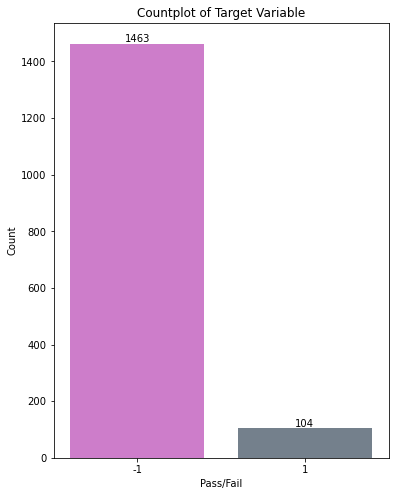

In [25]:
# Countplot of Target Variable
plt.figure(figsize=(6, 8))

pass_fail_counts = signal_df_clean3['Pass/Fail'].value_counts()

# Define custom colors for the bars
colors = ["orchid", "slategray"]

sns.countplot(data=signal_df_clean3, x='Pass/Fail', palette=colors)

plt.title('Countplot of Target Variable')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')

# Add data labels on top of each bar
for i, count in enumerate(pass_fail_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

- From the countplot above, it is evident that there is an imbalance in the distribution of the target variable. It will be further balanced using SMOTE

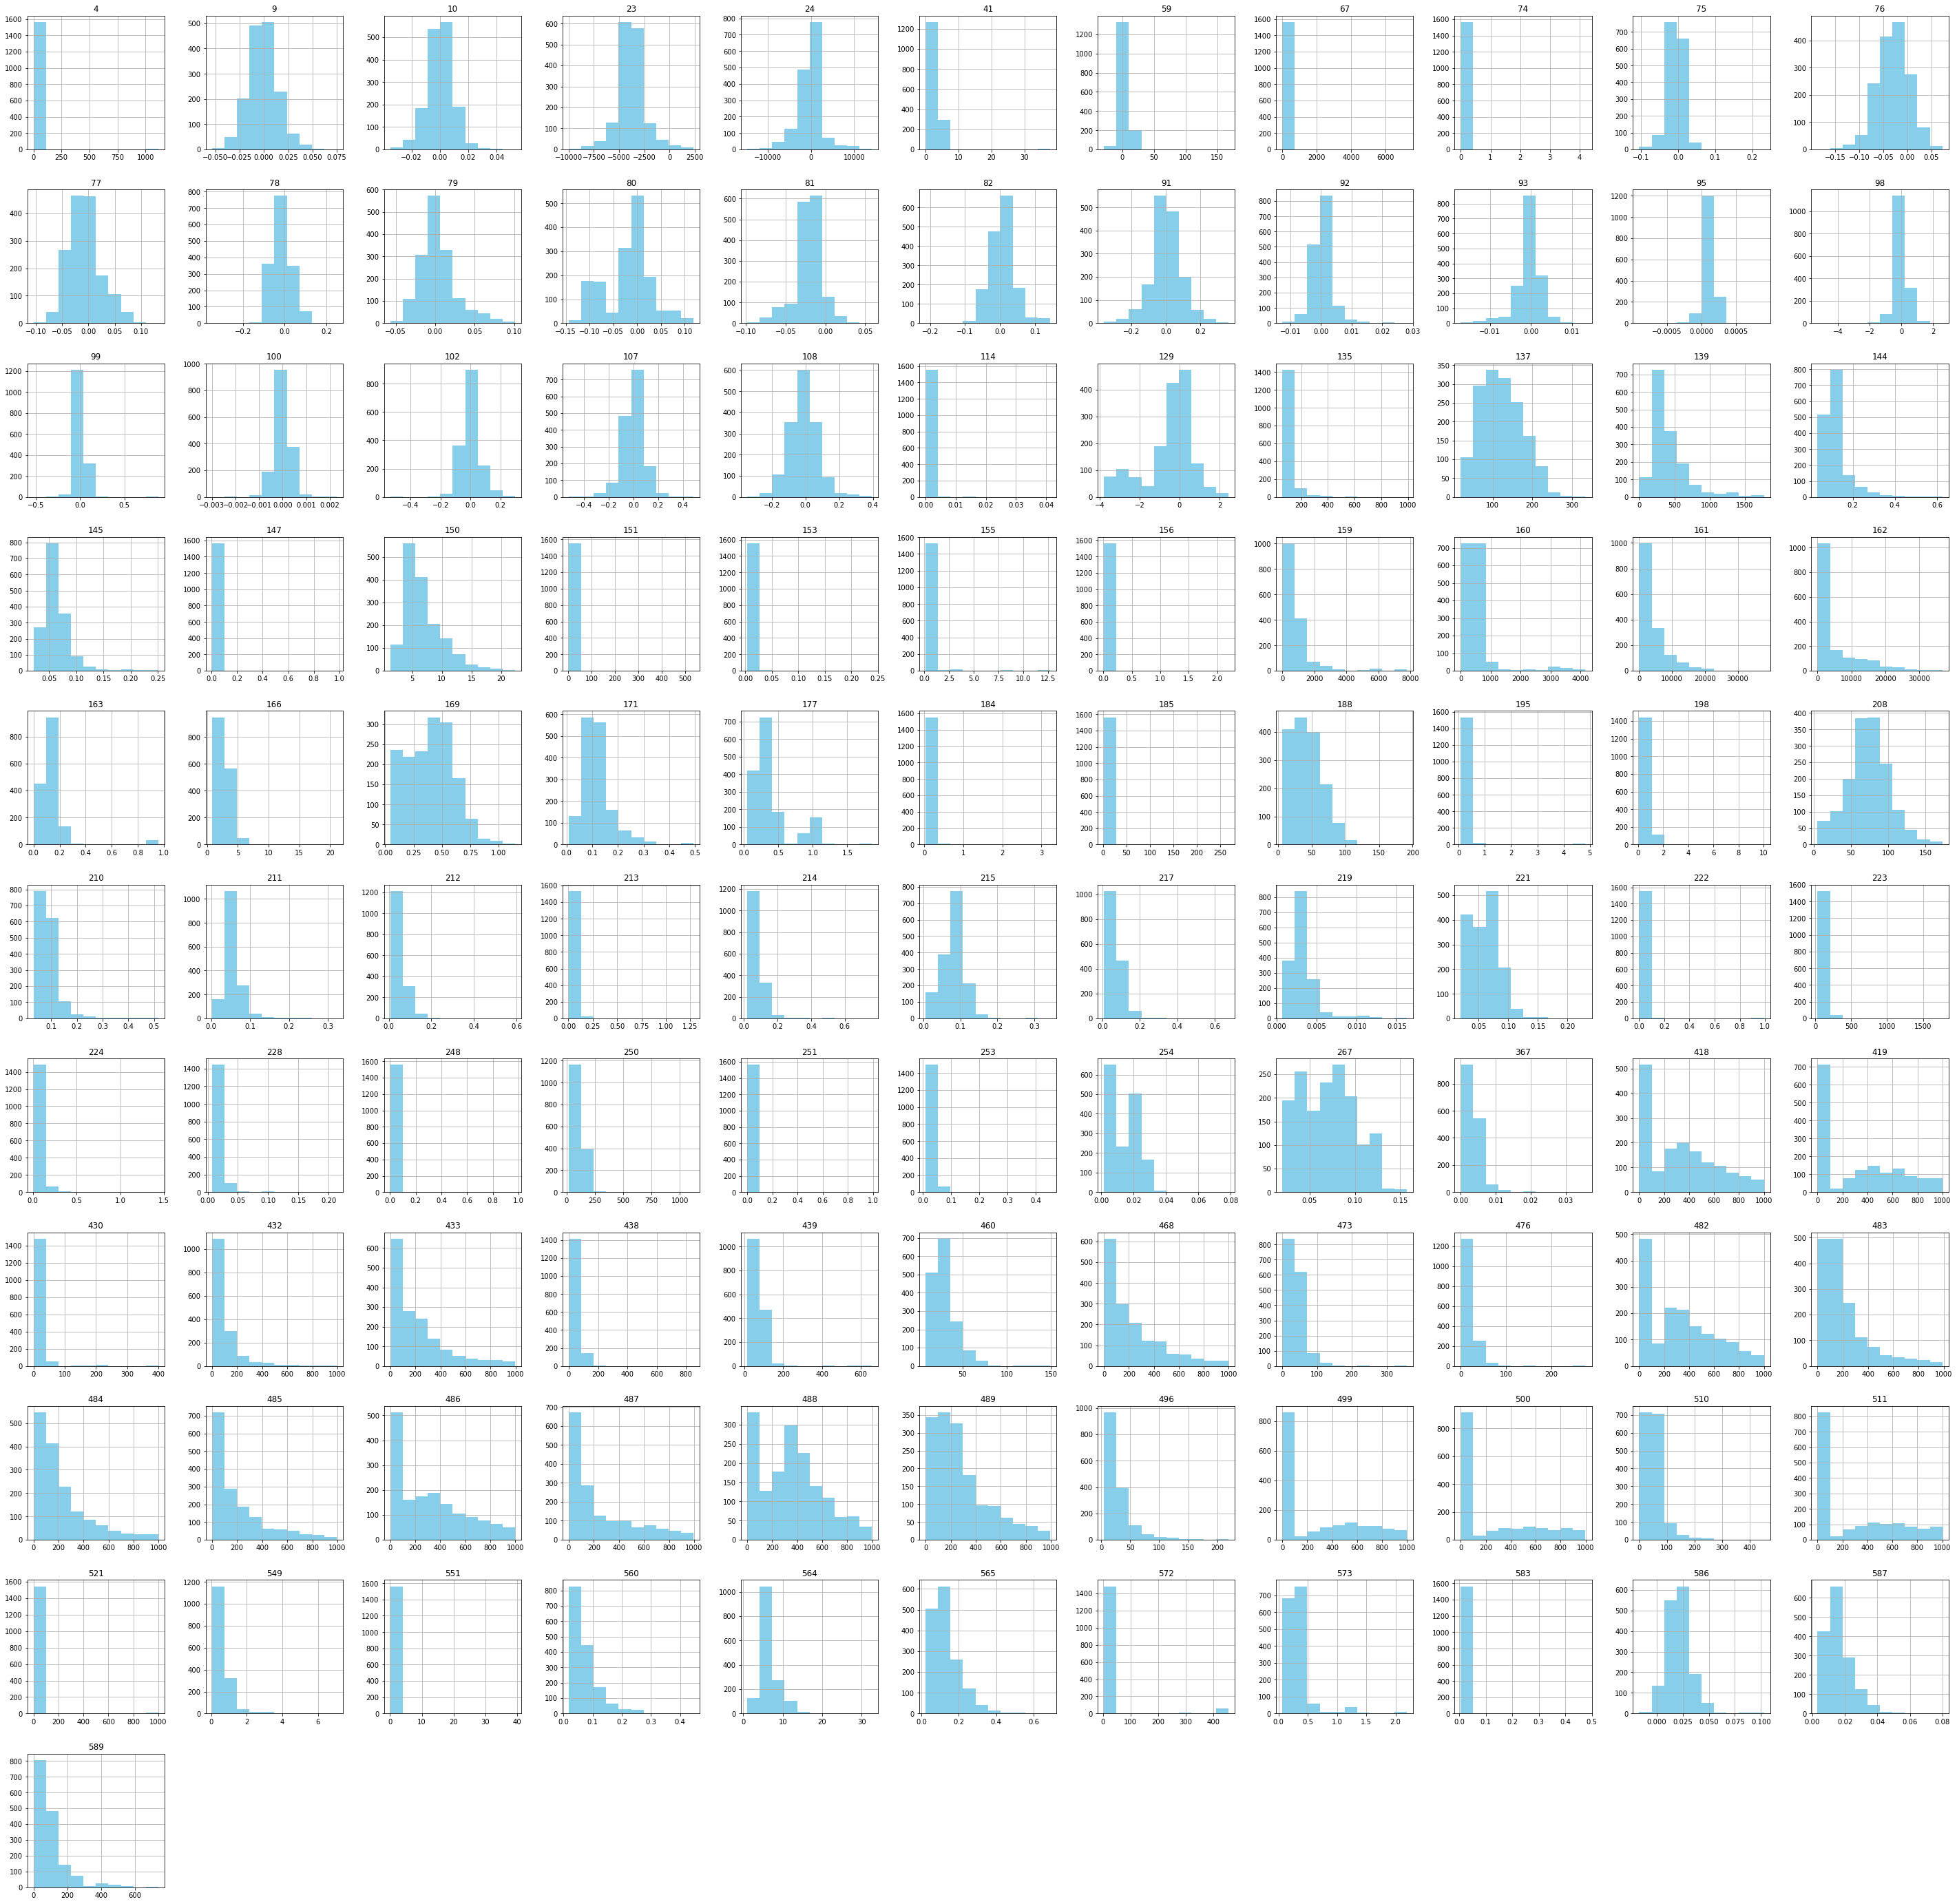

In [26]:
# Define the custom color
custom_color = "skyblue"

# Plot histogram
signal_df_clean3.hist(figsize=(50, 50),color=custom_color)

# Show the plot
plt.show()

- From the above histogram, it is seen that the values from different sensors are not all normally distributed.
- No clear pattern is observed. Some sensors have data that are skewed and uniform as well.

In [31]:
signal_df_clean3.describe().T

count         mean          std         min         25%        50%  \
4    1567.0     4.197013    56.103066      0.6815     1.01770     1.3171   
9    1567.0    -0.000841     0.015107     -0.0534    -0.01080    -0.0013   
10   1567.0     0.000146     0.009296     -0.0349    -0.00560     0.0004   
23   1567.0 -3806.299734  1379.280537  -9986.7500 -4370.62500 -3819.7500   
24   1567.0  -298.598136  2900.835956 -14804.5000 -1474.37500   -80.5000   
..      ...          ...          ...         ...         ...        ...   
573  1567.0     0.345636     0.248478      0.0667     0.24225     0.2934   
583  1567.0     0.015318     0.017174      0.0060     0.01160     0.0138   
586  1567.0     0.021458     0.012354     -0.0169     0.01345     0.0205   
587  1567.0     0.016475     0.008805      0.0032     0.01060     0.0148   
589  1567.0    99.670066    93.861936      0.0000    44.36860    72.0230   

           75%         max  
4       1.5296   1114.5366  
9       0.0084      0.0749  
10      0.0059      0.0530  
23  -3356.3750   2363.0000  
24   1376.2500  14106.0000  
..         ...         ...  
573     0.3669      2.1967  
583     0.0165      0.4766  
586     0.0276      0.1028  
587     0.0203      0.0799  
589   114.7497    737.3048  

[111 rows x 8 columns]

In [32]:
print('The size of the data:', signal_df_clean3.size)
print('No of rows in the data:', signal_df_clean3.shape[0])
print('No of columns in the data:', signal_df_clean3.shape[1])

The size of the data: 175504
No of rows in the data: 1567
No of columns in the data: 112


### 3.B.Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

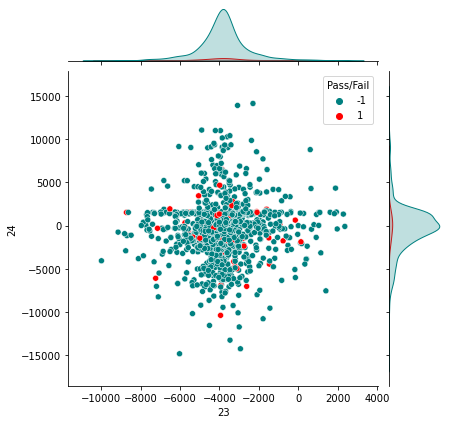

In [36]:
# Jointplot for 23 and 24 ( Bivariate Analysis)

# Define custom colors 
custom_colors = ['Teal', 'red']
# Create the jointplot with custom colors
sns.jointplot(data=signal_df_clean3, x='23', y='24', hue='Pass/Fail', palette=custom_colors)

# Display the plot
plt.show()

<AxesSubplot:xlabel='4', ylabel='9'>

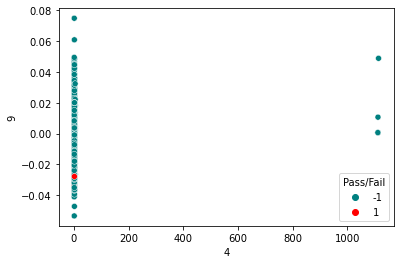

In [40]:
# scatterplot for 4 and 9

# Create the scatterplot with custom colors
sns.scatterplot(data=signal_df_clean3, x='4', y='9', hue='Pass/Fail', palette=custom_colors)

<AxesSubplot:xlabel='23', ylabel='24'>

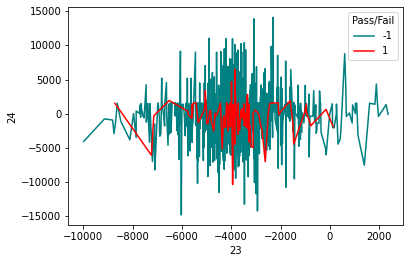

In [41]:
sns.lineplot(data=signal_df_clean3, x='23', y='24', hue='Pass/Fail', palette=custom_colors)

OVERALL INSIGHTS:

- We can observe that most of them has passed the test.
- There is no pattern to clearly say that a particular sensor reading is pass or fail.
- Because of the size and randomness of the sensor data, paiplot analysis isn't possible.
- Looking at the scatterplot most of the sensor signals have failed between - 0.04 and - 0.02 (4 & 9)

#### Pairplot

sns.pairplot(data=signal_df_clean3, hue='Pass/Fail')

Sinse the code takes longer time to exicute I have just mentioned the code above for pairplot as it is a part of multivariate analysis

In [44]:
# CORRELATION MATRIX

# Calculate the correlation matrix
correlation=signal_df_clean3.corr()
correlation

4         9        10        23        24        41        59  \
4    1.000000  0.054206 -0.006470  0.004969 -0.013636 -0.012742 -0.020577   
9    0.054206  1.000000 -0.064065 -0.072370  0.014420 -0.042435 -0.026476   
10  -0.006470 -0.064065  1.000000 -0.036071 -0.014916 -0.025927  0.085646   
23   0.004969 -0.072370 -0.036071  1.000000  0.030027  0.007710  0.003601   
24  -0.013636  0.014420 -0.014916  0.030027  1.000000 -0.005596  0.036681   
..        ...       ...       ...       ...       ...       ...       ...   
573 -0.016533  0.034474  0.021158  0.015454 -0.005300  0.004380  0.001516   
583 -0.001300 -0.036036  0.039060 -0.002134 -0.010550 -0.000840 -0.027673   
586 -0.043929  0.033738  0.000327  0.017676  0.016466 -0.025716 -0.042800   
587 -0.031005  0.059301  0.046965  0.021667  0.003232 -0.002800 -0.014624   
589  0.050910  0.004880  0.008393 -0.037950 -0.016735  0.013800  0.042628   

           67        74        75  ...       551       560       564  \
4   -0.002948 -0.000981  0.023082  ... -0.012623 -0.028849 -0.010889   
9   -0.029031 -0.019118  0.049423  ... -0.006443  0.020859  0.005414   
10   0.018817 -0.013943 -0.028658  ...  0.017313  0.014881  0.024627   
23  -0.015536 -0.042092 -0.008696  ... -0.009991 -0.025891 -0.033182   
24   0.011272 -0.008477  0.053163  ... -0.012492 -0.028322  0.003093   
..        ...       ...       ...  ...       ...       ...       ...   
573  0.073378 -0.008820 -0.030645  ... -0.023835 -0.043160  0.037974   
583  0.009574 -0.001647 -0.039981  ... -0.007091  0.032564 -0.010700   
586 -0.010514 -0.050283 -0.004506  ...  0.000620  0.002939  0.017960   
587  0.000013  0.000934 -0.048725  ... -0.011813 -0.002322 -0.017421   
589  0.025468  0.120153  0.008004  ... -0.004428 -0.002308 -0.001604   

          565       572       573       583       586       587       589  
4    0.040886 -0.012024 -0.016533 -0.001300 -0.043929 -0.031005  0.050910  
9   -0.035400  0.044216  0.034474 -0.036036  0.033738  0.059301  0.004880  
10   0.018570  0.047202  0.021158  0.039060  0.000327  0.046965  0.008393  
23   0.007587  0.024716  0.015454 -0.002134  0.017676  0.021667 -0.037950  
24  -0.021824 -0.020520 -0.005300 -0.010550  0.016466  0.003232 -0.016735  
..        ...       ...       ...       ...       ...       ...       ...  
573 -0.000254  0.787710  1.000000 -0.022666 -0.013504 -0.018896 -0.027153  
583  0.042122 -0.017368 -0.022666  1.000000  0.002257 -0.002649 -0.003008  
586  0.028386 -0.008668 -0.013504  0.002257  1.000000  0.167913 -0.486559  
587  0.009609 -0.001425 -0.018896 -0.002649  0.167913  1.000000  0.390813  
589  0.009927 -0.022672 -0.027153 -0.003008 -0.486559  0.390813  1.000000  

[111 rows x 111 columns]

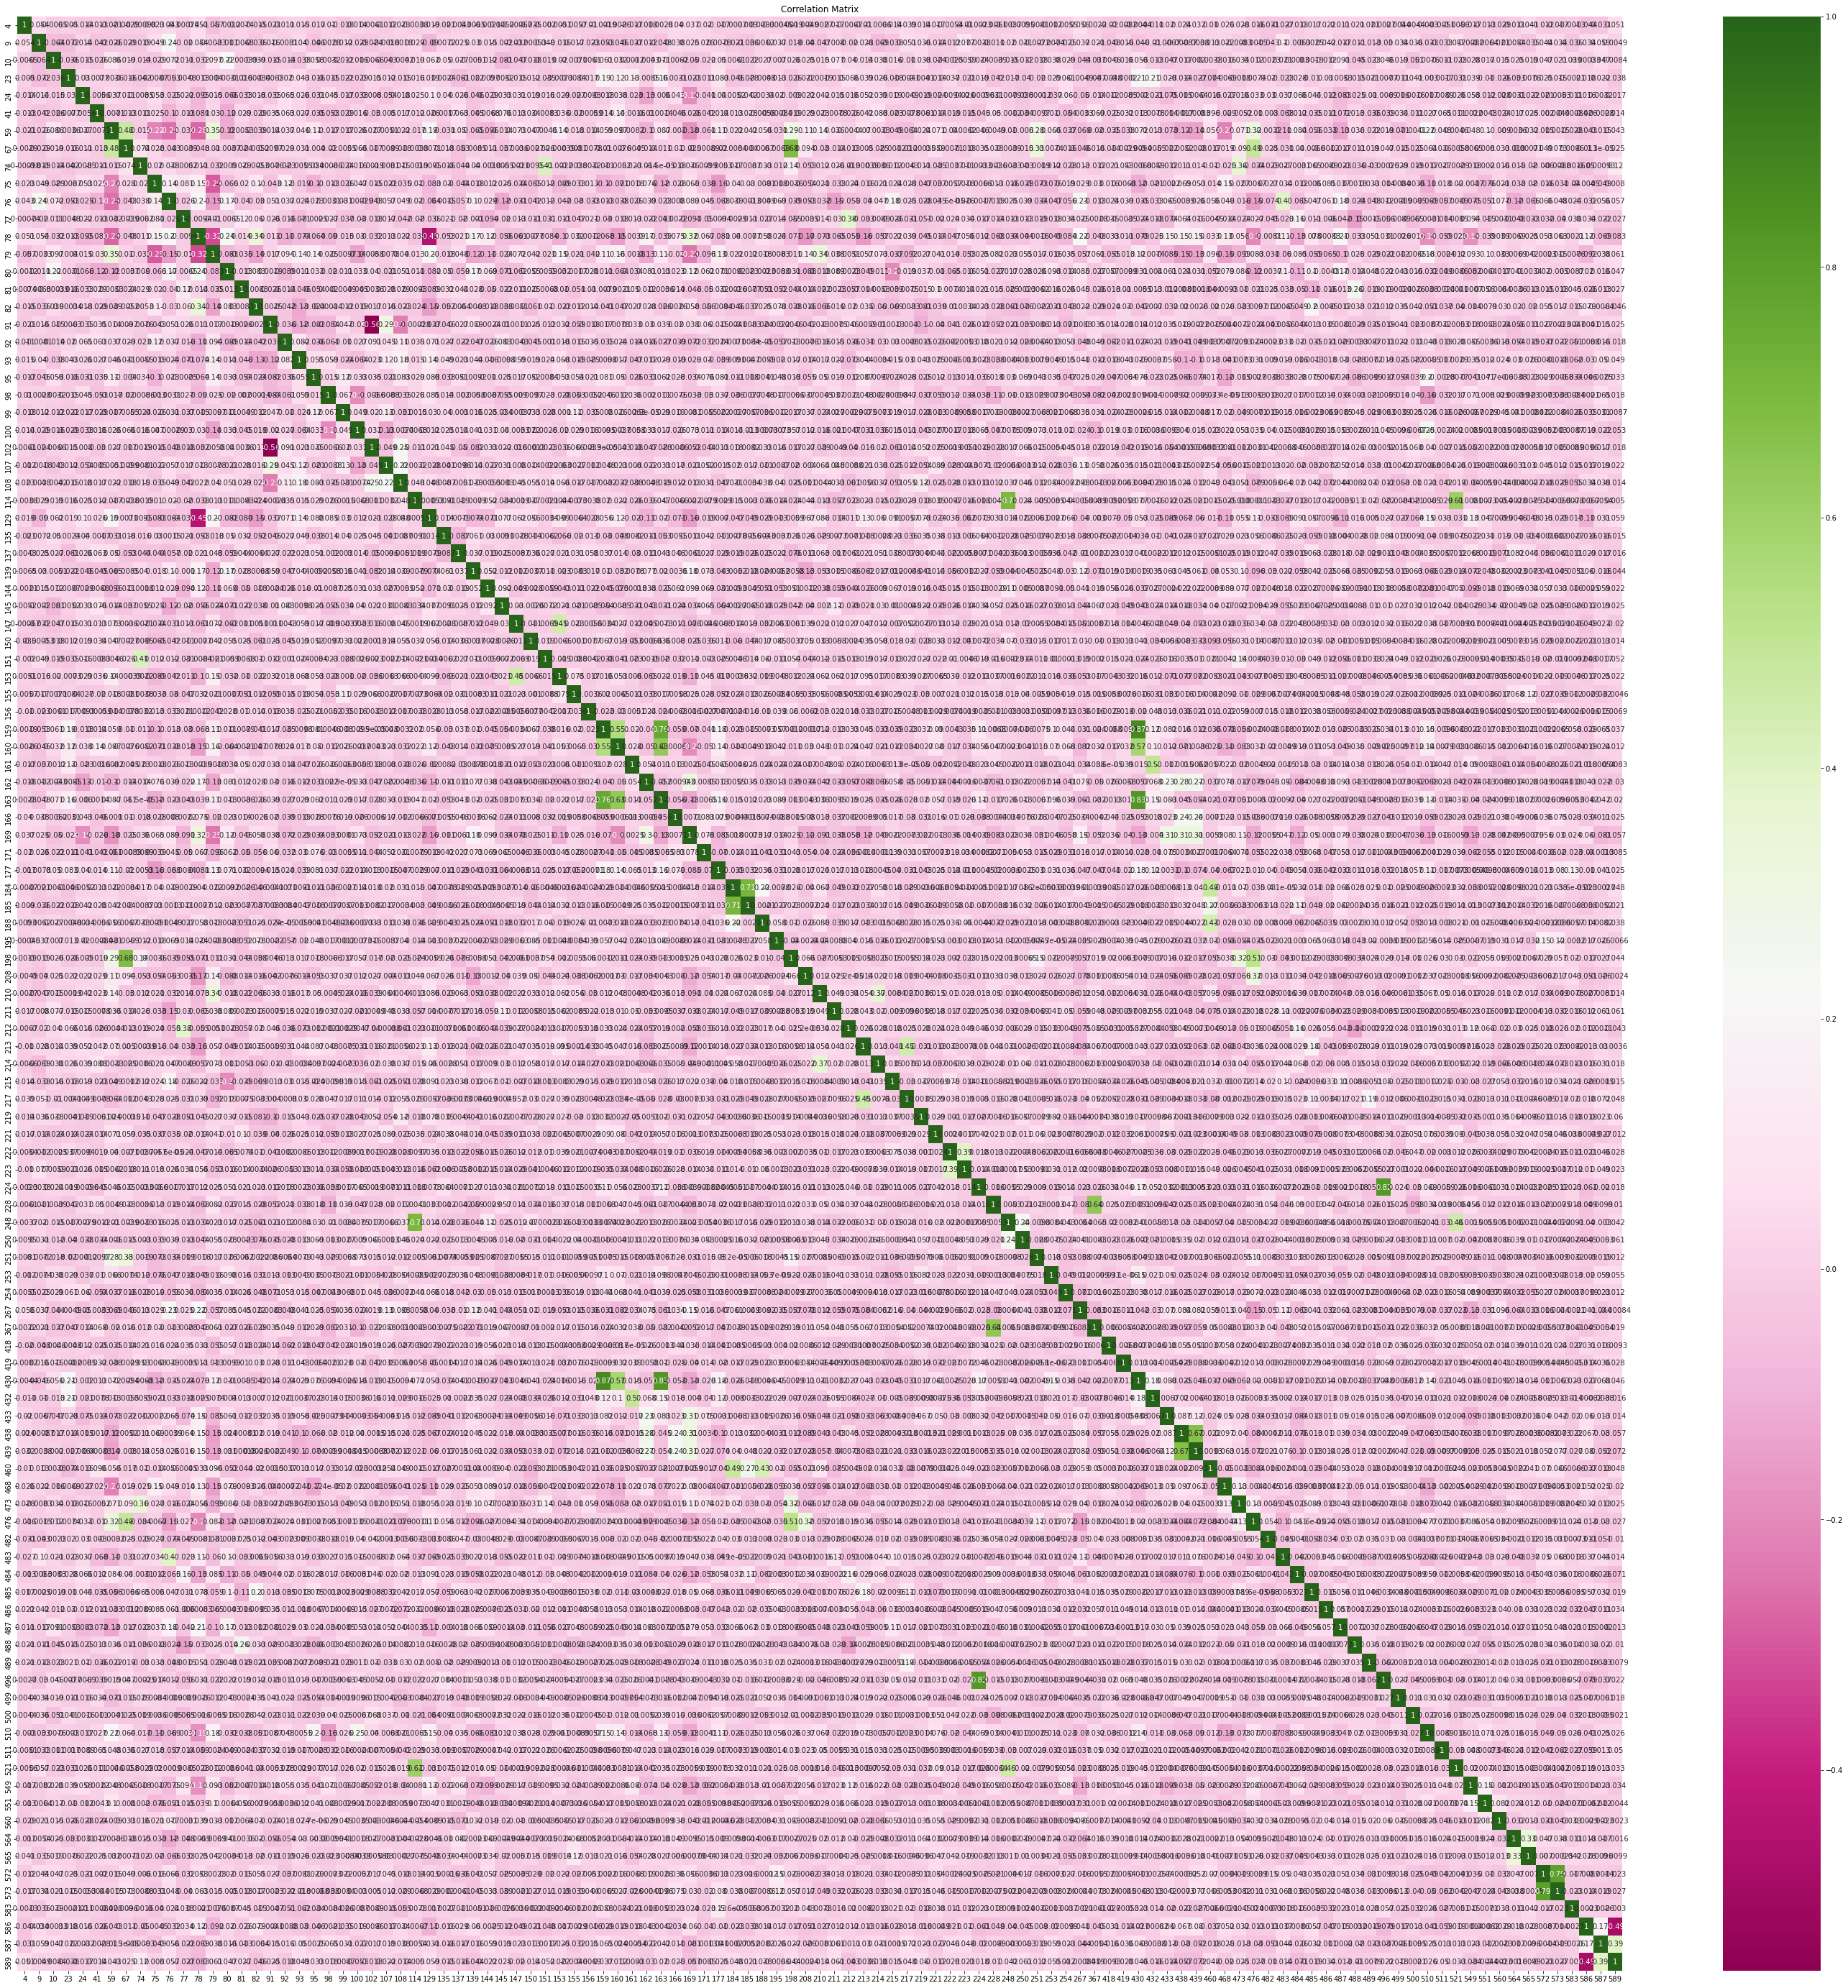

In [47]:
# Visualize the correlation matrix as a heatmap

# Set the size of the heatmap figure
plt.figure(figsize=(50, 50))

# Create the heatmap using seaborn
heatmap = sns.heatmap(correlation, annot=True, cmap='PiYG', cbar=True)

# Set the title
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

- It is hard to read the heat map as it has a lot of features.

# 4. Data pre-processing:

### Q4 A - Segregate predictors vs target attributes.

In [160]:
# Let predictors be X
X = signal_df_clean3.drop(columns = 'Pass/Fail', axis=1)

# Display names of columns
X.columns


Index(['4', '9', '10', '23', '24', '41', '59', '67', '74', '75',
       ...
       '551', '560', '564', '565', '572', '573', '583', '586', '587', '589'],
      dtype='object', length=111)

In [161]:
# Let target attributes be Y
y = signal_df_clean3['Pass/Fail']

# Display head
y.head()

0   -1
1   -1
2    1
3   -1
4   -1
Name: Pass/Fail, dtype: category
Categories (2, int64): [-1, 1]

### Q4 B - Check for target balancing and fix it if found imbalanced

In [162]:
# Find if target column is imbalanced
y.value_counts()

-1    1463
1      104
Name: Pass/Fail, dtype: int64

In [163]:
# Check the distribution of the target variable.
target_distribution = (signal_df_clean3['Pass/Fail'].value_counts() / signal_df_clean3['Pass/Fail'].value_counts().sum()) * 100
target_distribution

-1    93.363114
1      6.636886
Name: Pass/Fail, dtype: float64

- Clearly the target columns is imbalanced. -1 (Pass) is significantly higher than 1 (Fail) 
- We will use oversampling technique called SMOTE, to over come this problem.

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

- Before using smote we had to do a train-test split. 

In [165]:
# Synthetic Minority Over Sampling Technique

smote = SMOTE(sampling_strategy = 1 ,random_state=100)   
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

X_train_balanced.head()

4       9      10         23       24     41      59      67   74  \
0  0.9740 -0.0077  0.0018 -3913.0000  1516.75  4.021  2.8355  1.0304  0.0   
1  1.3377  0.0046  0.0042 -3799.0000  -637.25  2.919  4.3982  0.9388  0.0   
2  1.5123 -0.0136  0.0197 -2617.5000  1509.00  2.957  3.3364  0.8894  0.0   
3  0.7899 -0.0076  0.0112 -4696.6667   115.50  2.791 -4.9682  1.0246  0.0   
4  1.6347  0.0091 -0.0045 -6499.0000  1430.00  3.552 -1.0927  0.9870  0.0   

       75  ...       551     560       564      565   572     573     583  \
0 -0.0282  ...  1.010000  0.0332  3.830000  0.12530  8.38  0.3953  0.0136   
1 -0.0305  ...  1.890000  0.0802  4.980000  0.08770  9.43  0.1909  0.0106   
2  0.0175  ...  1.230712  0.0226  6.444985  0.14561  9.93  0.2932  0.0136   
3 -0.0114  ...  0.870000  0.0813  7.400000  0.11550  9.60  0.2265  0.0102   
4  0.0133  ...  1.580000  0.2042  6.444985  0.14561  7.19  0.2556  0.0127   

      586     587       589  
0  0.0120  0.0104   86.7035  
1  0.0133  0.0139  104.3034  
2  0.0121  0.0121  100.3091  
3  0.0218  0.0054   24.6547  
4  0.0335  0.0122   36.2970  

[5 rows x 111 columns]

In [166]:
y_train_balanced

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
2335    1
2336    1
2337    1
2338    1
2339    1
Name: Pass/Fail, Length: 2340, dtype: category
Categories (2, int64): [-1, 1]

In [167]:
# Find if target column is imbalanced
y_train_balanced.value_counts()

-1    1170
1     1170
Name: Pass/Fail, dtype: int64

### Q4 C - Perform train-test split and standardise the data or vice versa if required.

We have already split the data into train and test before balancing the data.

In [168]:
# Standardize Training Data

# Define method
scaler = StandardScaler()

# Perform standardization
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train_balanced), columns = X_train_balanced.columns)
normalized_x_train.head()

4         9        10        23        24        41        59  \
0 -0.040284 -0.468852  0.147481 -0.069700  0.754882  0.353989 -0.262499   
1 -0.029093  0.439499  0.432419  0.018305 -0.109986 -0.239700 -0.102850   
2 -0.023720 -0.904564  2.272645  0.930391  0.751770 -0.219228 -0.211326   
3 -0.045949 -0.461467  1.263489 -0.674670  0.192256 -0.308658 -1.059740   
4 -0.019953  0.771822 -0.600482 -2.066024  0.720050  0.101321 -0.663811   

         67        74        75  ...       551       560       564       565  \
0 -0.083233 -0.020743 -0.860887  ... -0.196820 -0.849468 -1.175019 -0.387238   
1 -0.083464 -0.020743 -0.948077  ...  0.282028  0.124202 -0.657338 -0.843524   
2 -0.083589 -0.020743  0.871531  ... -0.076721 -1.069062  0.002135 -0.140776   
3 -0.083247 -0.020743 -0.224024  ... -0.273000  0.146990  0.432042 -0.506164   
4 -0.083342 -0.020743  0.712316  ...  0.113343  2.693034  0.002135 -0.140776   

        572       573       583       586       587       589  
0 -0.210682  0.425664 -0.114998 -0.895169 -0.778438 -0.086332  
1 -0.195337 -0.660477 -0.323864 -0.779647 -0.348265  0.143147  
2 -0.188030 -0.116875 -0.114998 -0.886283 -0.569497  0.091067  
3 -0.192853 -0.471306 -0.351713 -0.024311 -1.392970 -0.895365  
4 -0.228073 -0.316674 -0.177658  1.015387 -0.557206 -0.743565  

[5 rows x 111 columns]

In [169]:
# Standardize Test Data
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
normalized_x_test.head()

4         9        10        23        24        41        59  \
0 -0.044780  0.409959 -1.882703  0.100713  0.271857 -0.782208 -0.844546   
1 -0.038940 -0.047909  0.254333  0.057161 -0.778814 -0.407786  0.365889   
2 -0.029431 -0.350692 -1.455296  0.056711  0.118778 -0.443343 -0.561833   
3  0.004243 -0.550086 -0.446140  0.003637 -0.125646 -0.150808 -0.214391   
4 -0.016144 -0.454082 -0.719206 -0.129914  0.782085 -0.683081 -0.063191   

         67        74        75  ...       551       560       564       565  \
0 -0.083578 -0.020743  0.079244  ... -0.022693 -0.379206 -0.657338 -0.843524   
1 -0.083790 -0.020743  0.211923  ... -0.365505 -0.982053  0.002135 -0.140776   
2 -0.083450 -0.020743 -0.242979  ... -0.528748 -0.435141  2.327204  0.973127   
3 -0.083693 -0.020743  0.420420  ... -0.398154  0.204996 -0.657338 -0.843524   
4 -0.083013 -0.020743  0.329440  ... -0.153288 -0.899188 -1.166016 -0.850806   

        572       573       583       586       587       589  
0 -0.232164 -0.609465  0.072981  0.775457  3.007080  0.523171  
1 -0.230849  0.347551 -0.114998  1.130909 -0.090162 -0.617519  
2 -0.164502 -0.114750 -0.045376 -1.517211  2.454001  8.396632  
3 -0.215066  0.118526 -0.240318 -2.379183 -0.409719  2.513925  
4 -0.201329 -0.797042 -0.372599 -1.152872 -0.692403  0.379278  

[5 rows x 111 columns]

### Q4 D - Check if the train and test data have similar statistical characteristics when compared with original data.

In [170]:
# 5-point summary of Original Data(signal_df_clean3)
original_data_summary = signal_df_clean3.describe().T

# 5-point summary of Train Data
train_data_summary = normalized_x_train.describe().T

# 5-point summary of Test Data
test_data_summary = normalized_x_test.describe().T

# Printing the summaries
print("5-point summary of Original Data:")
print(original_data_summary)

print("\n5-point summary of Train Data:")
print(train_data_summary)

print("\n5-point summary of Test Data:")
print(test_data_summary)

5-point summary of Original Data:
      count         mean          std         min         25%        50%  \
4    1567.0     4.197013    56.103066      0.6815     1.01770     1.3171   
9    1567.0    -0.000841     0.015107     -0.0534    -0.01080    -0.0013   
10   1567.0     0.000146     0.009296     -0.0349    -0.00560     0.0004   
23   1567.0 -3806.299734  1379.280537  -9986.7500 -4370.62500 -3819.7500   
24   1567.0  -298.598136  2900.835956 -14804.5000 -1474.37500   -80.5000   
..      ...          ...          ...         ...         ...        ...   
573  1567.0     0.345636     0.248478      0.0667     0.24225     0.2934   
583  1567.0     0.015318     0.017174      0.0060     0.01160     0.0138   
586  1567.0     0.021458     0.012354     -0.0169     0.01345     0.0205   
587  1567.0     0.016475     0.008805      0.0032     0.01060     0.0148   
589  1567.0    99.670066    93.861936      0.0000    44.36860    72.0230   

           75%         max  
4       1.5296   1114.53

The descriptive statistics of training and test data indicate that standardisation has brought the signal data on a common scale with little variation among them.

# 5. Model training, testing and tuning:

### Q5 A - Use any Supervised Learning technique to train a model.

In [171]:
# Fit the model on training data
logreg = LogisticRegression()

logreg.fit(normalized_x_train, y_train_balanced)
y_predict = logreg.predict(normalized_x_test)
model_score = logreg.score(normalized_x_test, y_test)

# Print Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(confusion_matrix)
print('\n')
# Print Classification Report
classification_report = metrics.classification_report(y_test, y_predict)
print("Classification Report:")
print(classification_report)

Confusion Matrix:
[[235  58]
 [ 10  11]]


Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.80      0.87       293
           1       0.16      0.52      0.24        21

    accuracy                           0.78       314
   macro avg       0.56      0.66      0.56       314
weighted avg       0.91      0.78      0.83       314



In [172]:
# Training Accuracy
print('Training Accuracy is: ',logreg.score(normalized_x_train, y_train_balanced)*100)

# Test Accuracy
print('Test Accuracy is: ',logreg.score(normalized_x_test, y_test)*100)

Training Accuracy is:  85.17094017094017
Test Accuracy is:  78.343949044586


### Q5 B - Use cross validation techniques.

#### Hint: Use all CV techniques that you have learnt in the course.

In [173]:
# KFold CV

# Define number of folds
num_folds = 50

# Create KFolds object
kfold = KFold(n_splits=num_folds)

# Store results of CV score
results = cross_val_score(logreg,normalized_x_train, y_train_balanced, cv=kfold)
results

array([0.78723404, 0.78723404, 0.76595745, 0.78723404, 0.82978723,
       0.76595745, 0.80851064, 0.78723404, 0.76595745, 0.78723404,
       0.72340426, 0.70212766, 0.80851064, 0.87234043, 0.68085106,
       0.87234043, 0.80851064, 0.76595745, 0.78723404, 0.74468085,
       0.76595745, 0.72340426, 0.85106383, 0.80851064, 0.78723404,
       0.80851064, 0.76595745, 0.91489362, 0.91489362, 0.85106383,
       0.80851064, 0.93617021, 0.85106383, 0.82978723, 0.93617021,
       0.85106383, 0.87234043, 0.87234043, 0.89361702, 0.89361702,
       0.84782609, 0.73913043, 0.93478261, 0.76086957, 0.86956522,
       0.89130435, 0.93478261, 0.84782609, 0.91304348, 0.95652174])

In [174]:
# Mean accuracy results
np.mean(abs(results))

0.8254024051803885

In [175]:
# Standard Deviation of accuracy results
results.std()

0.06716884369748

In [176]:
# Leave One Out Cross-Validation

# Store LOOCV scores
scores = cross_val_score(logreg, normalized_x_train, y_train_balanced, cv=LeaveOneOut())
scores

array([1., 0., 1., ..., 1., 1., 1.])

In [177]:
# Mean of scores
scores.mean()

0.8294871794871795

In [178]:
# Standard Deviation of scores
scores.std()

0.376082701747346

In [179]:
# k-fold cross validation with stratification
k = 10
stratified_kfold = StratifiedKFold(n_splits = k)
results = cross_val_score(logreg, normalized_x_train, y_train_balanced, cv = stratified_kfold)

In [180]:
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.8294871794871795
Standard deviation:  0.03183402148113454


In [181]:
# Bootstrapping
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

for i in range(bootstrap_iteration):
    X_, y_ = resample(normalized_x_train, y_train_balanced)
    logreg.fit(X_, y_)
    y_pred = logreg.predict(normalized_x_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)


In [182]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7671974522292994
Standard deviation:  0.016758372123468642


- k-fold cross validation with stratification gives the best results.
- The standard deviation is the lowest.

### Q5 C - Apply hyper-parameter tuning techniques to get the best accuracy.

#### Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. 

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Define grid
grid={"penalty":['l1','l2','elasticnet','none'],
      "C" : np.logspace(-5,5,10),
      "class_weight":['balanced','none'],
      "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      "random_state": [100]}

# Apply GridSearchCV
logreg=LogisticRegression()
grid_logreg=GridSearchCV(logreg,grid,cv=10)
grid_logreg.fit(normalized_x_train, y_train_balanced)

C:\Users\reshm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'class_weight': ['balanced', 'none'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [184]:
print("tuned hpyerparameters :(best parameters) ",grid_logreg.best_params_)
print("accuracy :",grid_logreg.best_score_*100)

tuned hpyerparameters :(best parameters)  {'C': 100000.0, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 100, 'solver': 'liblinear'}
accuracy : 83.63247863247864


In [185]:
# run randomized search
from sklearn.model_selection import RandomizedSearchCV

samples = 10  # number of random samples 
logreg_randomCV = RandomizedSearchCV(logreg, param_distributions=grid, n_iter=samples, random_state=100) #default cv = 3

logreg_randomCV.fit(normalized_x_train, y_train_balanced)


C:\Users\reshm\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line searc

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                                        'class_weight': ['balanced', 'none'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'random_state': [100],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100)

In [186]:
print("tuned hpyerparameters :(best parameters) ",logreg_randomCV.best_params_)
print("accuracy :",logreg_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'solver': 'newton-cg', 'random_state': 100, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 599.4842503189421}
accuracy : 82.86324786324786


### 5.D. Use any other technique/method which can enhance the model performance.

#### Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.

In [187]:
normalized_x_train.shape

(2340, 111)

In [188]:
from sklearn.decomposition import PCA
pca = PCA(111)# Initialize PCA object
pca.fit(normalized_x_train)  # Fit the PCA object with the train data

PCA(n_components=111)

In [189]:
# Covariance matrix
cov_matrix = np.cov(normalized_x_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Covariance Matrix 
%s [[ 1.00042753  0.05705061 -0.01913541 ... -0.01570429 -0.02996412
  -0.00653315]
 [ 0.05705061  1.00042753 -0.05986688 ...  0.03364953 -0.01488722
  -0.05447235]
 [-0.01913541 -0.05986688  1.00042753 ... -0.00299132  0.01406819
  -0.03041998]
 ...
 [-0.01570429  0.03364953 -0.00299132 ...  1.00042753  0.24583938
  -0.47351813]
 [-0.02996412 -0.01488722  0.01406819 ...  0.24583938  1.00042753
   0.38119276]
 [-0.00653315 -0.05447235 -0.03041998 ... -0.47351813  0.38119276
   1.00042753]]
Eigenvectors 
[[-1.45618541e-02 -8.88192599e-03  1.04343154e-02 ...  5.56830354e-02
  -2.15005476e-02  4.69784921e-03]
 [-8.19684489e-02  1.37066811e-02 -7.63690709e-03 ... -7.27227549e-02
   1.18884727e-01  5.49786859e-02]
 [ 3.87677900e-02  2.09811687e-03 -2.90127814e-02 ... -1.52059702e-01
   1.85937858e-03  1.33807103e-01]
 ...
 [-3.89794059e-02 -3.89461883e-02 -4.46669129e-02 ...  4.66001535e-02
  -1.60054346e-02 -6.72142230e-02]
 [ 8.76897781e-02 -2.89843641e-02 -1.03979215e-

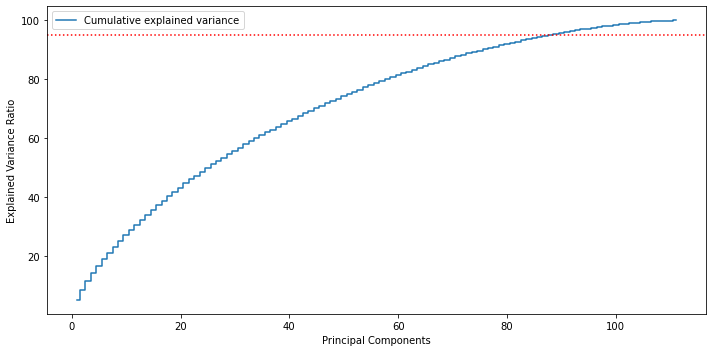

In [190]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')

# Plot horizontal line
# matplotlib.pyplot.axhline(y, xmin, xmax, color, label)

plt.axhline(95, 0, 20, color='red', linestyle='dotted')

plt.tight_layout()
plt.show()

- With approximately 85 variables we can explain over 95% of the variation in the original data!

In [191]:
pca_new = PCA(n_components=85)
pca_new.fit(normalized_x_train)

PCA(n_components=85)

In [192]:
# Check out the new components
df_comp1 = pd.DataFrame(pca_new.components_,columns=list(normalized_x_train))
df_comp1.head()

4         9        10        23        24        41        59  \
0 -0.014562 -0.081968  0.038768  0.126387  0.030241  0.020401  0.229014   
1 -0.008882  0.013706  0.002098 -0.144855  0.055459  0.045683  0.201856   
2  0.010434 -0.007637 -0.029013 -0.049361 -0.014576  0.072631  0.019948   
3 -0.014001 -0.120044 -0.006345  0.027766  0.020673 -0.020203  0.053283   
4 -0.000376  0.052229 -0.039143  0.115141  0.024332 -0.057699 -0.158430   

         67        74        75  ...       551       560       564       565  \
0  0.078427 -0.013176 -0.155990  ...  0.033847  0.032560 -0.039721 -0.011979   
1  0.245387  0.021509 -0.026516  ...  0.079470 -0.054339 -0.025016 -0.046080   
2 -0.039056 -0.023136 -0.050521  ... -0.016523  0.111223  0.046064  0.138190   
3  0.332773  0.046001  0.123348  ... -0.000054  0.047550  0.039659  0.062736   
4 -0.142817 -0.019702 -0.051123  ... -0.015142 -0.038289  0.035720 -0.164409   

        572       573       583       586       587       589  
0 -0.008361  0.001646  0.004252 -0.038979  0.087690  0.078108  
1  0.001992  0.017925  0.024701 -0.038946 -0.028985  0.012845  
2 -0.017614 -0.001496  0.003777 -0.044667 -0.010398  0.034285  
3 -0.030553 -0.039345  0.048489  0.120012 -0.013360 -0.105436  
4  0.099224  0.117936 -0.025812 -0.082742 -0.085439 -0.012472  

[5 rows x 111 columns]

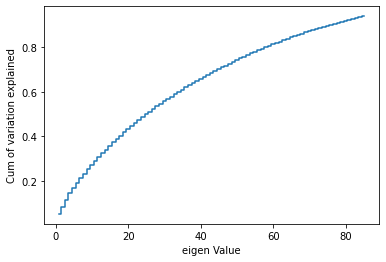

In [193]:
# Plot cumulative variances vs eigen values
plt.step(list(range(1,86)),np.cumsum(pca_new.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [194]:
# Create training dataset with the trained PCA model
pca_normalized_x_train = pca_new.transform(normalized_x_train)
pca_normalized_x_train

array([[ 0.62481204,  1.47413028, -1.25252443, ..., -0.16613924,
        -1.50790782, -0.66926108],
       [-1.45475394, -0.57923087, -0.09983415, ..., -0.02799539,
        -0.18119794, -0.0065983 ],
       [ 0.74450226,  0.5045502 , -1.1257876 , ..., -0.88689882,
        -0.58621416,  0.33393368],
       ...,
       [-1.77915929, -0.84250759, -0.54653115, ...,  0.05747615,
        -0.06037437,  0.10651668],
       [-0.7608322 , -0.04781518,  1.14162377, ..., -0.72492736,
         0.1017648 , -0.46084194],
       [-3.11354836, -3.40925097,  0.38348266, ...,  0.03936895,
         0.12757582,  0.50326352]])

In [195]:
# Create test dataset with the trained PCA model
pca_normalized_x_test = pca_new.transform(normalized_x_test)
pca_normalized_x_test

array([[-0.45184718,  0.5726767 , -0.10413002, ...,  1.03918588,
         0.26833858,  0.22653115],
       [-0.7938658 , -0.08450956, -0.13584899, ...,  0.29117143,
         0.00341736,  1.30120599],
       [ 0.06752442, -0.95612914, -0.39242439, ...,  0.38180697,
        -1.88148641,  0.43728009],
       ...,
       [-0.62294353, -0.09885735, -0.29926058, ..., -0.41119149,
        -0.83285477,  1.69863636],
       [-0.32920294,  1.40682575, -0.64158167, ...,  0.39773387,
         0.28226127, -0.30976566],
       [ 0.09331584,  0.97146479,  0.44628835, ..., -0.32276942,
        -0.97340341,  0.72077953]])

### 5.E Display and explain the classification report in detail.

In [196]:
# Choose the best parameters from GridSearchCV
lr = LogisticRegression(C= 100000.0, class_weight ='balanced', penalty = 'l2', random_state = 100, solver ='liblinear')
lr.fit(pca_normalized_x_train, y_train_balanced)

LogisticRegression(C=100000.0, class_weight='balanced', random_state=100,
                   solver='liblinear')

In [197]:
# Cross Validation
stratified_kfold = StratifiedKFold(n_splits = 10)
results = cross_val_score(lr, pca_normalized_x_train, y_train_balanced, cv = stratified_kfold)
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.8085470085470087
Standard deviation:  0.038452040612656384


In [198]:
# Training Accuracy
lr_train_accu = lr.score(pca_normalized_x_train, y_train_balanced)
print('Training Accuracy for Logistic Regression Model is: ',lr_train_accu*100)

# Test Accuracy
lr_test_accu = lr.score(pca_normalized_x_test, y_test)
print('Test Accuracy for Logistic Regression Model is: ',lr_test_accu*100)

Training Accuracy for Logistic Regression Model is:  82.77777777777777
Test Accuracy for Logistic Regression Model is:  76.43312101910828


In [199]:
y_predict_lr = lr.predict(pca_normalized_x_test)
#print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict_lr))

              precision    recall  f1-score   support

          -1       0.95      0.78      0.86       293
           1       0.14      0.48      0.21        21

    accuracy                           0.76       314
   macro avg       0.55      0.63      0.54       314
weighted avg       0.90      0.76      0.82       314



- The classes are being predicted with 75% accuracy.
- 95% of -1 class were predicted correctly as precision is 0.95.
- 14% of 1 class were predicted correctly as precision is 0.13.
- 77% of -1 class and 48% of 1 class were correctly identified, as given by recall.
- 85% of -1 class and 21% of 1 class predictions were identified correctly, as given by the f1-score.

In [200]:
conf_matrix = confusion_matrix(y_test, y_predict_lr)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[230  63]
 [ 11  10]]


In [201]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_lr).ravel()
lr_recall = round(tp/(tp+fn), 3)   # Recall
lr_precision = round(tp/(tp+fp), 3)  # Precision
lr_specificity =round(tn/(tn+fp),3)    # Specificity
lr_type_1_error = fp # False Positives
lr_type_2_error = fn # False Negatives
from sklearn.metrics import f1_score
lr_f1_score = f1_score(y_test,y_predict_lr) # F1 Score
lr_train_accu,lr_test_accu,lr_recall,lr_precision,lr_specificity,lr_type_1_error,lr_type_2_error,lr_f1_score


# Print the results or use them as needed
print("Recall:", lr_recall)
print("Precision:", lr_precision)
print("Specificity:", lr_specificity)
print("False Positives:", lr_type_1_error)
print("False Negatives:", lr_type_2_error)
print("F1 Score:", lr_f1_score)
print("Training Accuracy:", lr_train_accu)
print("Test Accuracy:", lr_test_accu)

Recall: 0.476
Precision: 0.137
Specificity: 0.785
False Positives: 63
False Negatives: 11
F1 Score: 0.2127659574468085
Training Accuracy: 0.8277777777777777
Test Accuracy: 0.7643312101910829


In [202]:
final_result = pd.DataFrame({'Model' : ['Logistic Regression'], 
                             'Training Accuracy' : [lr_train_accu], 
                             'Test Accuracy' : [lr_test_accu],
                             'Type 1 Error' : [lr_type_1_error],
                             'Type 2 Error' :  [lr_type_2_error],
                             'F1-Score':[lr_f1_score],})
final_result

Model  Training Accuracy  Test Accuracy  Type 1 Error  \
0  Logistic Regression           0.827778       0.764331            63   

   Type 2 Error  F1-Score  
0            11  0.212766

### 5.F. Apply the above steps for all possible models that you have learnt so far.

In [203]:
# Gaussian Naive Bayes Model for Classification

# Call library
from sklearn.naive_bayes import GaussianNB

# Define Model
gnb = GaussianNB()

# Fit the model
gnb.fit(pca_normalized_x_train, y_train_balanced)


GaussianNB()

In [204]:
# Cross Validation
stratified_kfold = StratifiedKFold(n_splits = 10)
results = cross_val_score(gnb, pca_normalized_x_train, y_train_balanced, cv = stratified_kfold)
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.9303418803418804
Standard deviation:  0.03487818359442855


- As there aren't many hyperparameters to tune for Gaussian Naive Bayes Model, hyperparameter tuning is skipped for this model

In [205]:
# Make predictions
y_predict_gnb = gnb.predict(pca_normalized_x_test)

# Training Accuracy
gnb_train_accu = gnb.score(pca_normalized_x_train, y_train_balanced)

# Test Accuracy
gnb_test_accu = gnb.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_gnb).ravel()
gnb_recall = round(tp/(tp+fn), 3)   # Recall
gnb_precision = round(tp/(tp+fp), 3)  # Precision
gnb_specificity =round(tn/(tn+fp),3)    # Specificity
gnb_type_1_error = fp # False Positives
gnb_type_2_error = fn # False Negatives
gnb_f1_score = f1_score(y_test,y_predict_gnb) # F1 Score
gnb_train_accu,gnb_test_accu,gnb_recall,gnb_precision,gnb_specificity,gnb_type_1_error,gnb_type_2_error,gnb_f1_score

print("Training Accuracy:", gnb_train_accu)
print("Test Accuracy:", gnb_test_accu)
print("Recall:", gnb_recall)
print("Precision:", gnb_precision)
print("Specificity:", gnb_specificity)
print("False Positives:", gnb_type_1_error)
print("False Negatives:", gnb_type_2_error)
print("F1 Score:", gnb_f1_score)

Training Accuracy: 0.9303418803418804
Test Accuracy: 0.8980891719745223
Recall: 0.143
Precision: 0.176
Specificity: 0.952
False Positives: 14
False Negatives: 18
F1 Score: 0.15789473684210528


In [206]:
print(metrics.classification_report(y_test, y_predict_gnb))

              precision    recall  f1-score   support

          -1       0.94      0.95      0.95       293
           1       0.18      0.14      0.16        21

    accuracy                           0.90       314
   macro avg       0.56      0.55      0.55       314
weighted avg       0.89      0.90      0.89       314



In [207]:
# Print Confusion Matrix
cm = confusion_matrix(y_test, y_predict_gnb)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[279  14]
 [ 18   3]]


In [208]:
final_result.loc[1] = ['Gaussian Naive Bayes', gnb_train_accu,gnb_test_accu,
                       gnb_type_1_error,gnb_type_2_error,gnb_f1_score]
final_result


Model  Training Accuracy  Test Accuracy  Type 1 Error  \
0   Logistic Regression           0.827778       0.764331            63   
1  Gaussian Naive Bayes           0.930342       0.898089            14   

   Type 2 Error  F1-Score  
0            11  0.212766  
1            18  0.157895

In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define Model
knn = KNeighborsClassifier()

# Define grid
grid = {
    "n_neighbors": list(range(1, 11)),
    "weights": ['uniform', 'distance'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute'],
    "leaf_size": list(range(1, 50, 5)),
    "metric": ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

knn_randomCV = RandomizedSearchCV(knn, param_distributions=grid, random_state=100, refit=True, cv=10)

knn_randomCV.fit(pca_normalized_x_train, y_train_balanced)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [1, 6, 11, 16, 21, 26, 31,
                                                      36, 41, 46],
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev', 'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=100)

In [210]:
print("tuned hpyerparameters :(best parameters) ",knn_randomCV.best_params_)
print("accuracy :",knn_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'weights': 'uniform', 'n_neighbors': 2, 'metric': 'euclidean', 'leaf_size': 1, 'algorithm': 'brute'}
accuracy : 83.4188034188034


In [211]:
# Make predictions
y_predict_knn = knn_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
knn_train_accu = knn_randomCV.score(pca_normalized_x_train, y_train_balanced)

# Test Accuracy
knn_test_accu = knn_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_knn).ravel()
knn_recall = round(tp/(tp+fn), 3)   # Recall
knn_precision = round(tp/(tp+fp), 3)  # Precision
knn_specificity =round(tn/(tn+fp),3)    # Specificity
knn_type_1_error = fp # False Positives
knn_type_2_error = fn # False Negatives
knn_f1_score = f1_score(y_test,y_predict_knn) # F1 Score

print(metrics.classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

          -1       0.95      0.67      0.79       293
           1       0.10      0.52      0.17        21

    accuracy                           0.66       314
   macro avg       0.53      0.60      0.48       314
weighted avg       0.89      0.66      0.74       314



In [212]:
conf_matrix = confusion_matrix(y_test, y_predict_knn)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[196  97]
 [ 10  11]]


In [213]:
final_result.loc[2] = ['K Nearest Neighbours', knn_train_accu,knn_test_accu,
                       knn_type_1_error,knn_type_2_error,knn_f1_score]
final_result

Model  Training Accuracy  Test Accuracy  Type 1 Error  \
0   Logistic Regression           0.827778       0.764331            63   
1  Gaussian Naive Bayes           0.930342       0.898089            14   
2  K Nearest Neighbours           1.000000       0.659236            97   

   Type 2 Error  F1-Score  
0            11  0.212766  
1            18  0.157895  
2            10  0.170543

In [214]:
# SVC Model
# Call library
from sklearn.svm import SVC

# Define Model
svc = SVC()

# Define grid
grid={'C': [0.1, 1, 10],
      'gamma': [1, 0.1, 0.01],
      'kernel': ['linear', 'rbf', 'sigmoid'],
      'random_state':[100]
      }

svc_randomCV = RandomizedSearchCV(svc, param_distributions=grid, random_state=100, refit=True, cv=10)

svc_randomCV.fit(pca_normalized_x_train, y_train_balanced)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [1, 0.1, 0.01],
                                        'kernel': ['linear', 'rbf', 'sigmoid'],
                                        'random_state': [100]},
                   random_state=100)

In [215]:
print("tuned hpyerparameters :(best parameters) ",svc_randomCV.best_params_)
print("accuracy :",svc_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'random_state': 100, 'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
accuracy : 99.44444444444444


In [216]:
# Make predictions
y_predict_svc = svc_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
svc_train_accu = svc_randomCV.score(pca_normalized_x_train, y_train_balanced)

# Test Accuracy
svc_test_accu = svc_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_svc).ravel()
svc_recall = round(tp/(tp+fn), 3)   # Recall
svc_precision = round(tp/(tp+fp), 3)  # Precision
svc_specificity =round(tn/(tn+fp),3)    # Specificity
svc_type_1_error = fp # False Positives
svc_type_2_error = fn # False Negatives
svc_f1_score = f1_score(y_test,y_predict_svc) # F1 Score

print(metrics.classification_report(y_test, y_predict_svc))

              precision    recall  f1-score   support

          -1       0.94      0.97      0.95       293
           1       0.18      0.10      0.12        21

    accuracy                           0.91       314
   macro avg       0.56      0.53      0.54       314
weighted avg       0.89      0.91      0.90       314



In [217]:
conf_matrix = confusion_matrix(y_test, y_predict_svc)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[284   9]
 [ 19   2]]


In [218]:
final_result.loc[3] = ['Support Vector Classifier', svc_train_accu,svc_test_accu,
                       svc_type_1_error,svc_type_2_error,svc_f1_score]
final_result

Model  Training Accuracy  Test Accuracy  Type 1 Error  \
0        Logistic Regression           0.827778       0.764331            63   
1       Gaussian Naive Bayes           0.930342       0.898089            14   
2       K Nearest Neighbours           1.000000       0.659236            97   
3  Support Vector Classifier           1.000000       0.910828             9   

   Type 2 Error  F1-Score  
0            11  0.212766  
1            18  0.157895  
2            10  0.170543  
3            19  0.125000

In [219]:
# Decision Tree Classifier Model
# Call library
from sklearn.tree import DecisionTreeClassifier

# Define Model
dt = DecisionTreeClassifier()

# Define grid
grid={'criterion': ['gini','entropy'],
      'max_depth': list(range(1, 5)),
      'min_samples_split': list(range(1, 5)),
      'min_samples_leaf': list(range(1, 5)),
      'class_weight':[None,'balanced'],
      'max_features':['sqrt','log2','auto',None],
      'random_state':[100]
      }
      

dt_randomCV = RandomizedSearchCV(dt, param_distributions=grid, random_state=100, refit=True, cv=10)

dt_randomCV.fit(pca_normalized_x_train, y_train_balanced)

C:\Users\reshm\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'random_state': [100]},
                   random_state=100)

In [220]:
print("tuned hpyerparameters :(best parameters) ",dt_randomCV.best_params_)
print("accuracy :",dt_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'random_state': 100, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'entropy', 'class_weight': 'balanced'}
accuracy : 68.80341880341881


In [221]:
# Make predictions
y_predict_dt = dt_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
dt_train_accu = dt_randomCV.score(pca_normalized_x_train, y_train_balanced)

# Test Accuracy
dt_test_accu = dt_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_dt).ravel()
dt_recall = round(tp/(tp+fn), 3)   # Recall
dt_precision = round(tp/(tp+fp), 3)  # Precision
dt_specificity =round(tn/(tn+fp),3)    # Specificity
dt_type_1_error = fp # False Positives
dt_type_2_error = fn # False Negatives
dt_f1_score = f1_score(y_test,y_predict_dt) # F1 Score

print(metrics.classification_report(y_test, y_predict_dt))

              precision    recall  f1-score   support

          -1       0.93      0.44      0.59       293
           1       0.06      0.52      0.11        21

    accuracy                           0.44       314
   macro avg       0.50      0.48      0.35       314
weighted avg       0.87      0.44      0.56       314



In [222]:
conf_matrix = confusion_matrix(y_test, y_predict_dt)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[128 165]
 [ 10  11]]


In [223]:
final_result.loc[4] = ['Decision Tree Classifier', dt_train_accu,dt_test_accu,
                       dt_type_1_error,dt_type_2_error,dt_f1_score]
final_result

Model  Training Accuracy  Test Accuracy  Type 1 Error  \
0        Logistic Regression           0.827778       0.764331            63   
1       Gaussian Naive Bayes           0.930342       0.898089            14   
2       K Nearest Neighbours           1.000000       0.659236            97   
3  Support Vector Classifier           1.000000       0.910828             9   
4   Decision Tree Classifier           0.705556       0.442675           165   

   Type 2 Error  F1-Score  
0            11  0.212766  
1            18  0.157895  
2            10  0.170543  
3            19  0.125000  
4            10  0.111675

In [224]:
# Random Forest Classifier Model
# Call library
from sklearn.ensemble import RandomForestClassifier

# Define Model
rf = RandomForestClassifier()

# Define grid
grid={'n_estimators': [10, 50, 100, 150, 200],
      'criterion': ['gini','entropy'],
      'max_depth': list(range(1, 5)),
      'min_samples_split': list(range(1, 5)),
      'min_samples_leaf': list(range(1, 5)),
      'class_weight':[None,'balanced','balanced_subsample'],
      'max_features':['sqrt','log2','auto'],
      'bootstrap':[True,False],
      'oob_score':[True,False],
      'random_state':[100]
      }
      

rf_randomCV = RandomizedSearchCV(rf, param_distributions=grid, random_state=100, refit=True, cv=10)

rf_randomCV.fit(pca_normalized_x_train, y_train_balanced)


C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [10, 50, 100, 150, 200],
                                        'oob_score': [True, False],
                                        'random_state': [100]},
                   random_state=100)

In [225]:
print("tuned hpyerparameters :(best parameters) ",rf_randomCV.best_params_)
print("accuracy :",rf_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'random_state': 100, 'oob_score': False, 'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 2, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}
accuracy : 89.1025641025641


In [226]:
# Make predictions
y_predict_rf = rf_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
rf_train_accu = rf_randomCV.score(pca_normalized_x_train, y_train_balanced)

# Test Accuracy
rf_test_accu = rf_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_rf).ravel()
rf_recall = round(tp/(tp+fn), 3)   # Recall
rf_precision = round(tp/(tp+fp), 3)  # Precision
rf_specificity =round(tn/(tn+fp),3)    # Specificity
rf_type_1_error = fp # False Positives
rf_type_2_error = fn # False Negatives
rf_f1_score = f1_score(y_test,y_predict_rf) # F1 Score

print(metrics.classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

          -1       0.95      0.84      0.89       293
           1       0.13      0.33      0.19        21

    accuracy                           0.81       314
   macro avg       0.54      0.59      0.54       314
weighted avg       0.89      0.81      0.84       314



In [227]:
conf_matrix = confusion_matrix(y_test, y_predict_rf)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[247  46]
 [ 14   7]]


In [228]:
final_result.loc[5] = ['Random Forest Classifier', rf_train_accu,rf_test_accu,
                       rf_type_1_error,rf_type_2_error,rf_f1_score]
final_result


Model  Training Accuracy  Test Accuracy  Type 1 Error  \
0        Logistic Regression           0.827778       0.764331            63   
1       Gaussian Naive Bayes           0.930342       0.898089            14   
2       K Nearest Neighbours           1.000000       0.659236            97   
3  Support Vector Classifier           1.000000       0.910828             9   
4   Decision Tree Classifier           0.705556       0.442675           165   
5   Random Forest Classifier           0.903846       0.808917            46   

   Type 2 Error  F1-Score  
0            11  0.212766  
1            18  0.157895  
2            10  0.170543  
3            19  0.125000  
4            10  0.111675  
5            14  0.189189

In [229]:
# AdaBoost Classifier Model
# Call library
from sklearn.ensemble import AdaBoostClassifier

# Define Model
ada_boost = AdaBoostClassifier()

# Define grid
grid={'n_estimators': [10, 50, 100],
      'algorithm': ['SAMME', 'SAMME.R'],
      'learning_rate':[0,0.25,0.5,0.75,1],
      'random_state':[100]
      }

ada_randomCV = RandomizedSearchCV(ada_boost, param_distributions=grid, random_state=100, refit=True, cv=10)

ada_randomCV.fit(pca_normalized_x_train, y_train_balanced)

C:\Users\reshm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\reshm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 124, in fit
    self._validate_params()
  File "C:\Users\reshm\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\reshm\anaconda3\lib\si

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0, 0.25, 0.5, 0.75,
                                                          1],
                                        'n_estimators': [10, 50, 100],
                                        'random_state': [100]},
                   random_state=100)

In [230]:
print("tuned hpyerparameters :(best parameters) ",ada_randomCV.best_params_)
print("accuracy :",ada_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'random_state': 100, 'n_estimators': 100, 'learning_rate': 0.75, 'algorithm': 'SAMME.R'}
accuracy : 96.06837606837605


In [231]:
# Make predictions
y_predict_ada = ada_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
ada_train_accu = ada_randomCV.score(pca_normalized_x_train, y_train_balanced)

# Test Accuracy
ada_test_accu = ada_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_ada).ravel()
ada_recall = round(tp/(tp+fn), 3)   # Recall
ada_precision = round(tp/(tp+fp), 3)  # Precision
ada_specificity =round(tn/(tn+fp),3)    # Specificity
ada_type_1_error = fp # False Positives
ada_type_2_error = fn # False Negatives
ada_f1_score = f1_score(y_test,y_predict_ada) # F1 Score

print(metrics.classification_report(y_test, y_predict_ada))

              precision    recall  f1-score   support

          -1       0.93      0.97      0.95       293
           1       0.09      0.05      0.06        21

    accuracy                           0.90       314
   macro avg       0.51      0.51      0.51       314
weighted avg       0.88      0.90      0.89       314



In [232]:
conf_matrix = confusion_matrix(y_test, y_predict_ada)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[283  10]
 [ 20   1]]


In [233]:
final_result.loc[6] = ['AdaBoost Classifier', ada_train_accu,ada_test_accu,
                       ada_type_1_error,ada_type_2_error,ada_f1_score]
final_result

Model  Training Accuracy  Test Accuracy  Type 1 Error  \
0        Logistic Regression           0.827778       0.764331            63   
1       Gaussian Naive Bayes           0.930342       0.898089            14   
2       K Nearest Neighbours           1.000000       0.659236            97   
3  Support Vector Classifier           1.000000       0.910828             9   
4   Decision Tree Classifier           0.705556       0.442675           165   
5   Random Forest Classifier           0.903846       0.808917            46   
6        AdaBoost Classifier           0.994872       0.904459            10   

   Type 2 Error  F1-Score  
0            11  0.212766  
1            18  0.157895  
2            10  0.170543  
3            19  0.125000  
4            10  0.111675  
5            14  0.189189  
6            20  0.062500

In [234]:
# Gradient Boosting Classifier Model
# Call library
from sklearn.ensemble import GradientBoostingClassifier

# Define Model
gbcl = GradientBoostingClassifier()

# Define grid
grid={'n_estimators': [10, 50, 100],
      'loss': ['deviance', 'exponential'],
      'learning_rate':[0,0.25,0.5,0.75,1],
      'min_samples_split': list(range(1, 5)),
      'min_samples_leaf': list(range(1, 5)),
      'max_depth': list(range(1, 5)),
      'max_features':['sqrt','log2','auto'],
      'random_state':[100]
      }

gbcl_randomCV = RandomizedSearchCV(gbcl, param_distributions=grid, random_state=100, refit=True, cv=10)

gbcl_randomCV.fit(pca_normalized_x_train, y_train_balanced)

C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is e

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0, 0.25, 0.5, 0.75,
                                                          1],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [1, 2, 3, 4],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [10, 50, 100],
                                        'random_state': [100]},
                   random_state=100)

In [235]:
print("tuned hpyerparameters :(best parameters) ",gbcl_randomCV.best_params_)
print("accuracy :",gbcl_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'random_state': 100, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 4, 'loss': 'deviance', 'learning_rate': 1}
accuracy : 98.67521367521368


In [236]:
# Make predictions
y_predict_gbcl = gbcl_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
gbcl_train_accu = gbcl_randomCV.score(pca_normalized_x_train, y_train_balanced)

# Test Accuracy
gbcl_test_accu = gbcl_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_gbcl).ravel()
gbcl_recall = round(tp/(tp+fn), 3)   # Recall
gbcl_precision = round(tp/(tp+fp), 3)  # Precision
gbcl_specificity =round(tn/(tn+fp),3)    # Specificity
gbcl_type_1_error = fp # False Positives
gbcl_type_2_error = fn # False Negatives
gbcl_f1_score = f1_score(y_test,y_predict_gbcl) # F1 Score

print(metrics.classification_report(y_test, y_predict_gbcl))

              precision    recall  f1-score   support

          -1       0.93      0.99      0.96       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



In [237]:
final_result.loc[7] = ['Gradient Boosting Classifier', gbcl_train_accu,gbcl_test_accu,
                       gbcl_type_1_error,gbcl_type_2_error,gbcl_f1_score]
final_result

Model  Training Accuracy  Test Accuracy  \
0           Logistic Regression           0.827778       0.764331   
1          Gaussian Naive Bayes           0.930342       0.898089   
2          K Nearest Neighbours           1.000000       0.659236   
3     Support Vector Classifier           1.000000       0.910828   
4      Decision Tree Classifier           0.705556       0.442675   
5      Random Forest Classifier           0.903846       0.808917   
6           AdaBoost Classifier           0.994872       0.904459   
7  Gradient Boosting Classifier           1.000000       0.926752   

   Type 1 Error  Type 2 Error  F1-Score  
0            63            11  0.212766  
1            14            18  0.157895  
2            97            10  0.170543  
3             9            19  0.125000  
4           165            10  0.111675  
5            46            14  0.189189  
6            10            20  0.062500  
7             2            21  0.000000

In [238]:
# Bagging Classifier Model
# Call library
from sklearn.ensemble import BaggingClassifier

# Define Model
bgcl = BaggingClassifier()

# Define grid
grid={'n_estimators': [5, 10, 15],
      'base_estimator':[SVC(),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(),GaussianNB()],
      #'bootstrap':[True,False],
      #'oob_score':[True,False],
      'random_state':[100]
      }

bgcl_randomCV = RandomizedSearchCV(bgcl, param_distributions=grid, random_state=100, refit=True, cv=10)

bgcl_randomCV.fit(pca_normalized_x_train, y_train_balanced)

C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-p

RandomizedSearchCV(cv=10, estimator=BaggingClassifier(),
                   param_distributions={'base_estimator': [SVC(),
                                                           DecisionTreeClassifier(),
                                                           LogisticRegression(),
                                                           KNeighborsClassifier(),
                                                           GaussianNB()],
                                        'n_estimators': [5, 10, 15],
                                        'random_state': [100]},
                   random_state=100)

In [239]:
print("tuned hpyerparameters :(best parameters) ",bgcl_randomCV.best_params_)
print("accuracy :",bgcl_randomCV.best_score_*100)

tuned hpyerparameters :(best parameters)  {'random_state': 100, 'n_estimators': 5, 'base_estimator': SVC()}
accuracy : 98.24786324786325


In [240]:
# Make predictions
y_predict_bgcl = bgcl_randomCV.predict(pca_normalized_x_test)

# Training Accuracy
bgcl_train_accu = bgcl_randomCV.score(pca_normalized_x_train, y_train_balanced)

# Test Accuracy
bgcl_test_accu = bgcl_randomCV.score(pca_normalized_x_test, y_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predict_bgcl).ravel()
bgcl_recall = round(tp/(tp+fn), 3)   # Recall
bgcl_precision = round(tp/(tp+fp), 3)  # Precision
bgcl_specificity =round(tn/(tn+fp),3)    # Specificity
bgcl_type_1_error = fp # False Positives
bgcl_type_2_error = fn # False Negatives
bgcl_f1_score = f1_score(y_test,y_predict_bgcl) # F1 Score

print(metrics.classification_report(y_test, y_predict_bgcl))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94       293
           1       0.18      0.19      0.19        21

    accuracy                           0.89       314
   macro avg       0.56      0.56      0.56       314
weighted avg       0.89      0.89      0.89       314



In [241]:
conf_matrix = confusion_matrix(y_test, y_predict_bgcl)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[275  18]
 [ 17   4]]


## 6. Post Training and Conclusion:


### 6.A. Display and compare all the models designed with their train and test accuracies.

In [242]:
final_result.loc[8] = ['Bagging Classifier', bgcl_train_accu,bgcl_test_accu,
                       bgcl_type_1_error,bgcl_type_2_error,bgcl_f1_score]
final_result

Model  Training Accuracy  Test Accuracy  \
0           Logistic Regression           0.827778       0.764331   
1          Gaussian Naive Bayes           0.930342       0.898089   
2          K Nearest Neighbours           1.000000       0.659236   
3     Support Vector Classifier           1.000000       0.910828   
4      Decision Tree Classifier           0.705556       0.442675   
5      Random Forest Classifier           0.903846       0.808917   
6           AdaBoost Classifier           0.994872       0.904459   
7  Gradient Boosting Classifier           1.000000       0.926752   
8            Bagging Classifier           0.994444       0.888535   

   Type 1 Error  Type 2 Error  F1-Score  
0            63            11  0.212766  
1            14            18  0.157895  
2            97            10  0.170543  
3             9            19  0.125000  
4           165            10  0.111675  
5            46            14  0.189189  
6            10            20  0.062500  
7             2            21  0.000000  
8            18            17  0.186047

### 6.B. Select the final best trained model along with your detailed comments for selecting this model.

the Gradient Boosting Classifier (Model 7) appears to be the best trained model among the options. Here's the reasoning for selecting this model:

- Test Accuracy: The Gradient Boosting Classifier has the highest test accuracy of 92.68%, indicating that it performs well on unseen data compared to other models.

- F1-Score: The F1-Score for this model is 0.000, which is the lowest among the models. However, the F1-Score might not always be the most critical metric, especially in scenarios where either precision or recall is more important. In this case, the F1-Score is low because there are only two misclassifications in the positive class, leading to a very low recall. The model is focusing more on precision.

- Type 1 Error (False Positives): The Gradient Boosting Classifier has the lowest number of Type 1 Errors, with only 2 false positives. This is a desirable characteristic when avoiding false alarms or unnecessary actions.

- Type 2 Error (False Negatives): The model has 21 false negatives, which is not the lowest but still relatively acceptable considering it has a high accuracy and low Type 1 Error.

Overall, the Gradient Boosting Classifier achieves a good balance between accuracy and Type 1 Error, which are crucial factors depending on the specific application. While its F1-Score is low, this might not be a significant concern if the emphasis is on reducing false positives (Type 1 Error) rather than recall (Type 2 Error). The model's high accuracy and low Type 1 Error make it a strong candidate as the final best trained model for this specific task.

### 6C. Pickle the selected model for future use.

In [243]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('GradientBoostingClassifier_RandomSearchCV', 'wb') as files:
    pickle.dump(gbcl_randomCV, files)
    
print("File saved successfully!")

File saved successfully!


### 6.D. Write your conclusion on the results.

In [245]:
# Define Gradient Boosting Model with best features
gbcl = GradientBoostingClassifier(random_state=100, n_estimators= 100, min_samples_split=2, 
                                  min_samples_leaf= 2, max_features='log2', max_depth= 4, 
                                  loss= 'deviance', learning_rate= 1)

# Fit the model
gbcl.fit(pca_normalized_x_train, y_train_balanced)

C:\Users\reshm\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GradientBoostingClassifier(learning_rate=1, loss='deviance', max_depth=4,
                           max_features='log2', min_samples_leaf=2,
                           random_state=100)

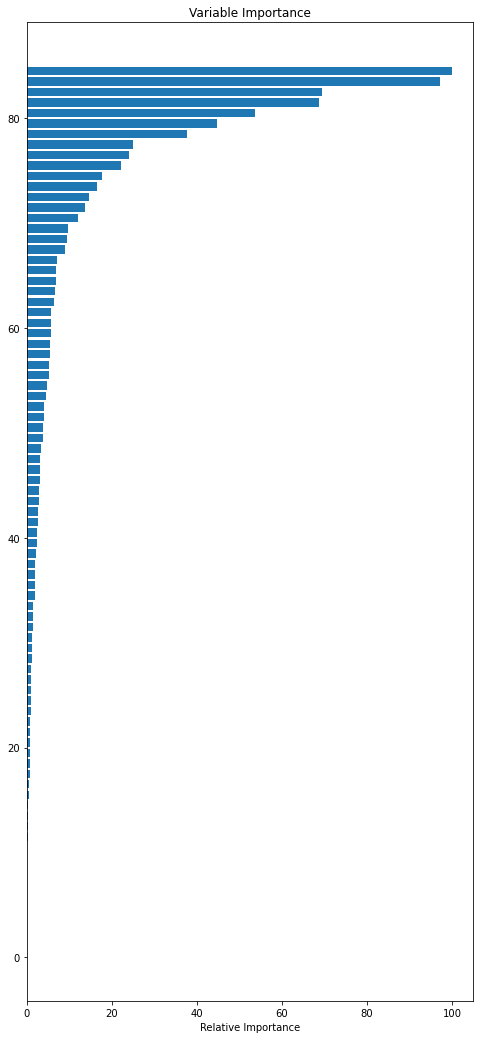

In [246]:
# Plot feature importance
feature_importance = gbcl.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, tr_x.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


- The given dataset has data from different sensors. But not all were actually required to model it.
- Many sensors had highly correlated values and multi-collinearity issues and were thus removed before model building.
- PCA was also done to remove additional variables that did not have high variance.
- Various algorithms, cross validation technqiues and hyper parameter tuning was done to arrive at the best fitting model.
- The Best Trained Model is Gradient Boosting Classifier for this kind of data.